# Red Automotive Insurance **Customer Lifetime Value Prediction Model**

**JCDS 0406 011 - Muhamad Shidqi**

## Contents

1. **Business Problem Understanding**

    * Background Context

    * Problem Statement

    * Objective

    * Analytic Approach

2. **Data Understanding**

3. **Data Preprocessing**

4. **Modelling**

5. **Conclusion**

## Business Problem Understanding

**Background Context**

In the pursuit of customer-centric excellence, **Red Car Insurance Company** introduces a groundbreaking machine learning model for examine **Customer Lifetime Value (CLV)** of Red customers. This project strategically to facing issues in retaining customers and wants to advertise promotional offers for Red loyal customers.

Customer Lifetime Value (CLV) is an important metric in the car insurance industry that measures the net present value of a customer over their lifetime. CLV helps insurers to identify high-value customers and optimize the marketing strategies to retain them. Peter Drucker said “The purpose of a business is to create and keep a customer.” Which pretty much sums up the value of Customer Lifetime Value (CLV). CLV helps make important business decisions about strategies of sales, marketing, product development, and customer support.
* Marketing: How much should I spend to acquire a new customer?

* Product: How can I offer products and services tailored for my best customers?

* Customer Support: How much should I spend to service and retain a customer?

* Sales: What types of customers should sales reps spend the most time on trying to acquire?

Their practices to ensure long-term customer happiness and loyalty.

**Problems Statement**

It’s a competitive market for automotive insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their campaign in more detail, and much more.

CLV obtained from the difference between the total amount of revenues from a customer and the total cost of servicing them. Red marketers should focus on tracking the customer lifetime value and acquisition costs of the customers by connecting their marketing data to their sales data. The higher CLV of customerts comes mostly through longer retention, and retention of customers is typically the most important factor in the industry. Therefore, Red should focus on retaining customers and making them more valuable to increase their profits.

Calculating customer lifetime value based on its history **takes quite a long time** (calculating the entire time the customer is with the company). By the time the calculation is completed, business strategies may be **too late to implement**, for example, in offering insurance renewals. A method is needed to predict customer lifetime value.

By predicting customer lifetime value, a company can determine which customers are likely to have high value and which are not. The company can focus its marketing activities on customers with high customer lifetime value, making marketing expenses more effective and efficient. Although the usefulness of the prediction will only be beneficial when the prediction is accurate.

**Objective**

Based on the problem statement above, Red need machine learning model to predict **customer lifetime value** of their customers. For this situation regression model can be implement to **predict the customer lifetime** value based on **sales and marketing data of Red customer**.

As a Data Scientist for Red, I gonna choose which regression model that most suits for I use as based of **Red CLV Machine Learning Model**.

**Analytic Approach**

1. First, I do Explantory Data Analysis (EDA) on Red Data Sales. 
2. Then, I do Data Preprocessing on the dataset so it become suitable and can be processed by the model.
3. Next, I do Feature Engineering on the feature if needed.
4. After that, I do model benchmarking from some of existed powerful regression model and choose the best fit model for our dataset.
5. Last, I do some residual analysis to determine how well the model captures the underlying patterns in the data. Because I use linear regression, the residuals should be normally distributed with a mean of zero and constant variance across the range of predicted values. This help us to ensure that the model's performance is consistent across different subsets of the data and that the model is robust enough to generalize well to unseen data.

**Metric Evaluation**

In regression machine learning, several metrics are commonly used to evaluate model performance, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²) coefficient, Mean Absolute Percentage Error (MAPE), and Root Mean Squared Logarithmic Error (RMSLE). These metrics offer complementary perspectives on the performance of the model, allowing me to assess predictive accuracy, error distribution, and goodness of fit. By considering multiple metrics, I can gain a comprehensive understanding of the strengths and limitations of their regression models, facilitating informed decision-making and model optimization efforts.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

#Data Processing Library
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

#Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing Library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

#Data Modeling Library
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import GridSearchCV, KFold

## Data Understanding

**Attributes Information**

**No**  |       **Feature**       |                   **Description**                  |    **Data Type**   |
:------:|:-----------------------:|:--------------------------------------------------:|:------------------:|
1       | Vehicle Class           | Type of customer vehicle.                          |Object              |
2       | Coverage                | Protection package for customer vehicle.           |Object              |
3       | Renew Offer Type        | Offer that customer take to extend the protection. |Object              |
4       | Employment Status       | Customer current job status.                       |Object              |
5       | Marital Status          | Marital status of customer.                        |Object              |
6       | Education               | Education degree of customer.                      |Object              |
7       | Number of Policies      | Insurance policies that customer already have.     |Float               |
8       | Monthly Premium Auto    | Insurance premium rate of customer.                |Float               |
9       | Total Claim Amount      | Customer total claim to company.                   |Float               |
10      | Income                  | Income value of customer.                          |Float               |
11      | Customer Lifetime Value | The CLV value of customer.                         |Float               |

* From attributes information above I can see there is 11 columns in our dataset. **Customer Lifetime Value** column will I use as dependent variable (target) of our model. While, another 10 columns will gonna use as independent variables (features) of our model.

* There are 7 category columns and 4 numeric columns.

Now let's do EDA to our dataset.

In [2]:
#Import Dataset
source = pd.read_csv('data_customer_lifetime_value.csv')
source.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


## Explorative Data Analysis (EDA)

In [3]:
#Overview with Profile Report
# display(ProfileReport(source))

In [4]:
display(source.info(), source.describe(), source.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


None

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


### Invalid Data

* From Profile Report we know there is 1,429 (25.9%) "0" value in income column.

In [5]:
sample = source[source['Income'] == 0]
display(sample.describe(), sample.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,1429.000000,1429.000000,1429.000000,1429.0,1429.000000
mean,3.057383,93.687894,595.598378,0.0,7684.433265
std,2.411355,32.849231,323.439890,0.0,6437.745039
min,1.000000,61.000000,2.704934,0.0,1898.007675
25%,1.000000,69.000000,376.923839,0.0,3788.814643
50%,2.000000,84.000000,525.600000,0.0,5714.246379
75%,4.000000,110.000000,725.870693,0.0,8662.048958
max,9.000000,290.000000,2759.794354,0.0,64618.757150


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,1429,1429,1429,1429,1429,1429
unique,6,3,4,1,3,5
top,Four-Door Car,Basic,Offer1,Unemployed,Single,High School or Below
freq,712,853,752,1429,811,486


* When I check further the data, the zero income all come from Unemployed in the Employment Status. But the value of the other columns seems distribute normally and didn't have missing value. Even the value of CLV from all the zero data have positive and big variance. Actually this indicate fraud, based domain knowledge this fraud commonly happen when the vehicle information isn't directly under the real owner names.

* I gonne retain this data from our dataset because this usually do by the customer as tax avoidance.

In [3]:
categorycal_feature = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Education']
numerical_feature = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

#### Vehicle Class

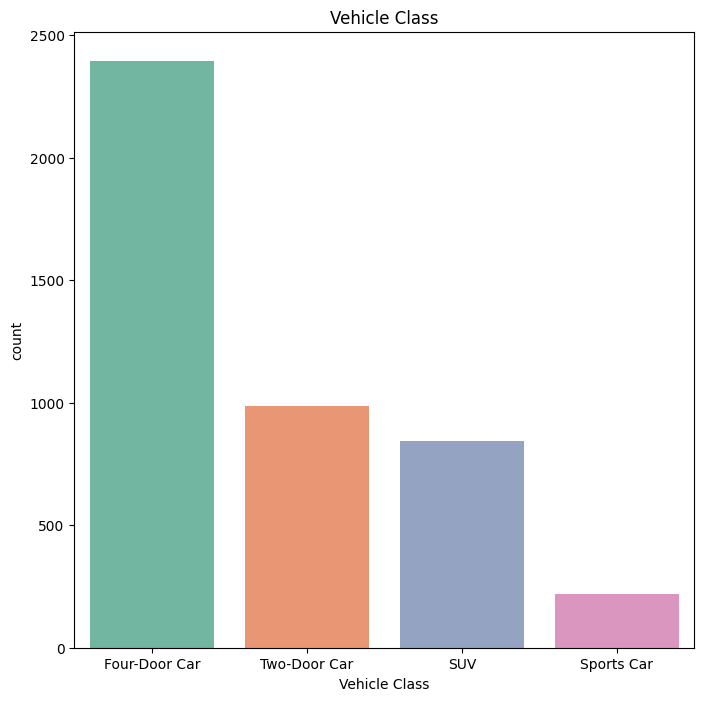

In [64]:
# #Seaborn Chart of Vehicle Class
plt.figure(figsize=(8,8))
sns.countplot(x='Vehicle Class', data=source, palette='Set2')
plt.title('Vehicle Class')
plt.show()

Visualization below is the same visualization from Vehicle Class Column with Plotly Library

In [63]:
# #Vehicle Class
# #Plotly Pie Chart of Vehicle Class
# vehicle_class_counts = source['Vehicle Class'].value_counts()

# # Convert the Series to DataFrame for Plotly
# df_vehicle_class_counts = vehicle_class_counts.reset_index()
# df_vehicle_class_counts.columns = ['Vehicle Class', 'Count']

# # Create a bar chart
# vc_fig = px.pie(df_vehicle_class_counts, names='Vehicle Class', values='Count', color='Vehicle Class',
#              title='Vehicle Class',
#              labels=df_vehicle_class_counts.columns)

# vc_fig.show()

* 50% vehicle who insured is Four-Door Car, make Four-Door car the most vehicle insured insured in red. Follow by SUV and Two-Door Car, around 20% of the total vehicle insured car.

#### Coverage

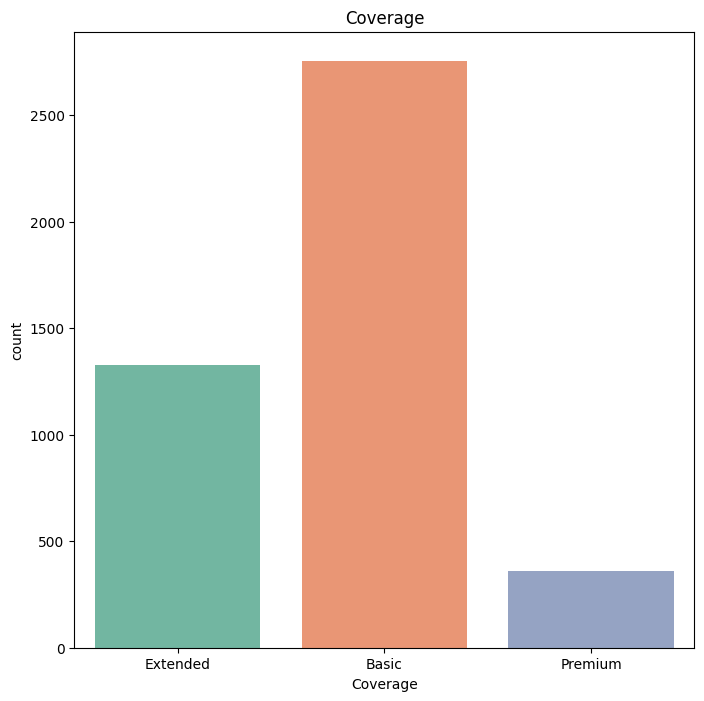

In [62]:
# #Seaborn Chart of Coverage
plt.figure(figsize=(8,8))
sns.countplot(x='Coverage', data=source, palette='Set2')
plt.title('Coverage')
plt.show()

Visualizaton below is the same visualization from Coverage Column with Plotly Library

In [61]:
# #Coverage
# coverage_counts = source['Coverage'].value_counts()

# # Convert the Series to DataFrame for Plotly
# df_coverage_counts = coverage_counts.reset_index()
# df_coverage_counts.columns = ['Coverage', 'Count']

# # Create a bar chart
# coverage_fig = px.pie(df_coverage_counts, names='Coverage', values='Count', color='Coverage',
#              title='Coverage',
#              labels=df_coverage_counts.columns)
# coverage_fig.show()

* The most loved product from Red Autoinsurance are the basic one, with more than half red customers have it. The less unfavorite product are the premium one, usually customers choose Premium coverage for their luxury car but the luxury car are less insured in Red. 

#### Renew Offer Type

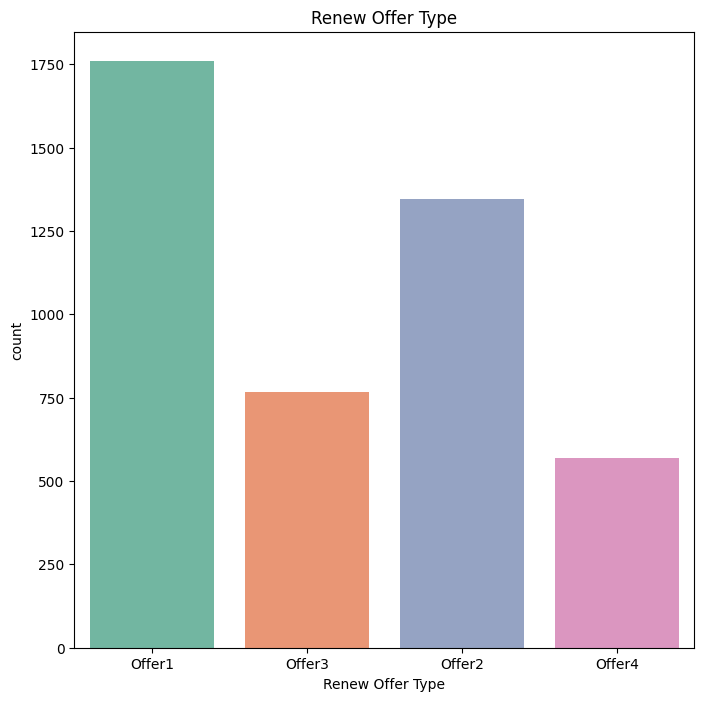

In [60]:
# #Seaborn Chart of Renew Offer Type
plt.figure(figsize=(8,8))
sns.countplot(x='Renew Offer Type', data=source, palette='Set2')
plt.title('Renew Offer Type')
plt.show()

Visualizaton below is the same visualization from Renew Offer Type Column with Plotly Library

In [59]:
# #Renew Offer Type
# renew_offer_type_counts = source['Renew Offer Type'].value_counts()

# # Convert the Series to DataFrame for Plotly
# df_renew_offer_type_counts = renew_offer_type_counts.reset_index()
# df_renew_offer_type_counts.columns = ['Renew Offer Type', 'Count']

# # Create a bar chart
# renew_offer_type_fig = px.pie(df_renew_offer_type_counts, names='Renew Offer Type', values='Count', color='Renew Offer Type',
#              title='Renew Offer Type',
#              labels=df_renew_offer_type_counts.columns)
# renew_offer_type_fig.show()

Red offer some renew packages to their customers for extend the policies. The most interesting package for customers is the Package 1 and follow by Package 2.

#### Employment Status

In [6]:
source.rename(columns={'EmploymentStatus': 'Employment Status'}, inplace=True)

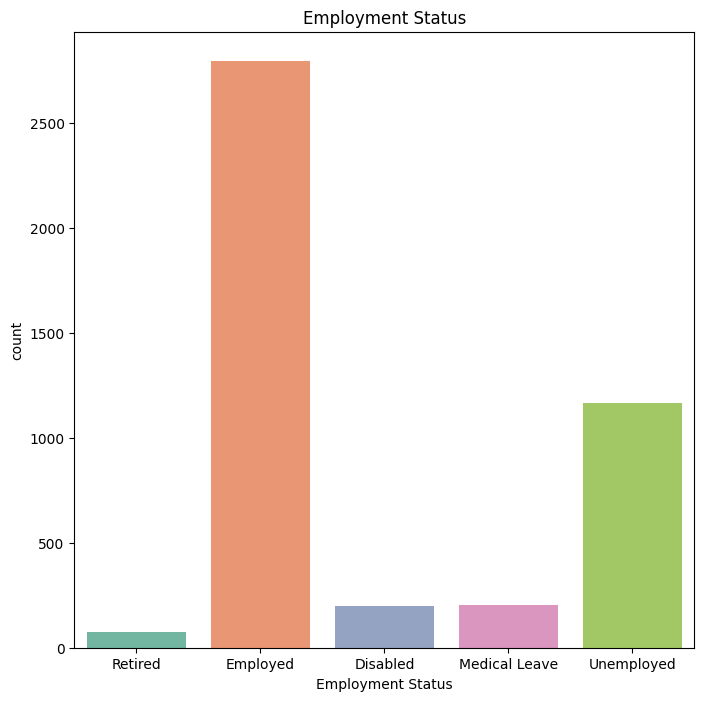

In [58]:
# #Seaborn Chart of Employment Status
plt.figure(figsize=(8,8))
sns.countplot(x='Employment Status', data=source, palette='Set2')
plt.title('Employment Status')
plt.show()

Visualizaton below is the same visualization from Employment Status Column with Plotly Library

In [57]:
#Employment Status
employment_status_counts = source['Employment Status'].value_counts()

# # Convert the Series to DataFrame for Plotly
# df_employment_status_counts = employment_status_counts.reset_index()
# df_employment_status_counts.columns = ['Employment Status', 'Count']

# # Create a bar chart
# employment_status_fig = px.pie(df_employment_status_counts, names='Employment Status', values='Count', color='Employment Status',
#              title='Employment Status',
#              labels=df_employment_status_counts.columns)
# employment_status_fig.show()

* Despite a significant portion being employed 62.5%, there is also notable representation from other employment categories such as unemployed 25.2%. This diversity suggests that insurance policies cater to a wide spectrum of individuals, including those in various stages of employment and life situations.

#### Marital Status

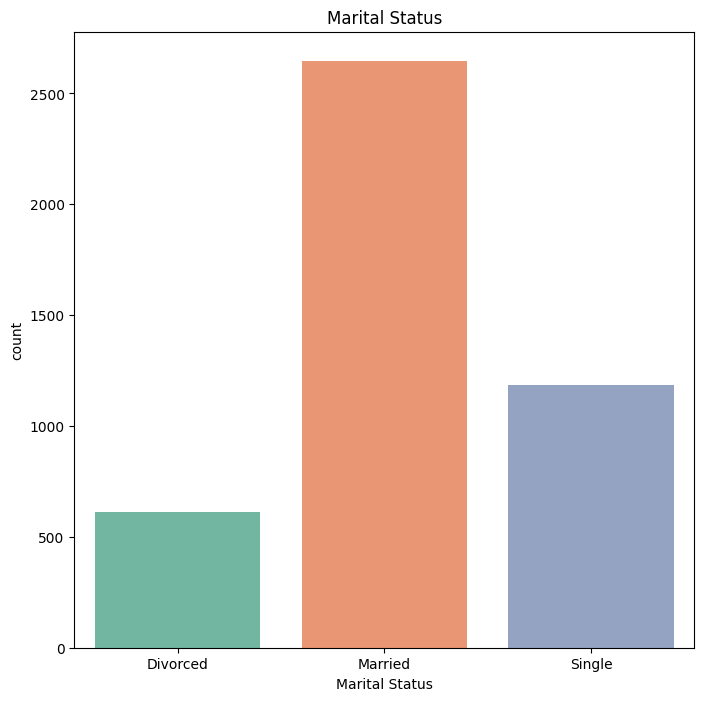

In [56]:
# #Seaborn Chart of Marital Status
plt.figure(figsize=(8,8))
sns.countplot(x='Marital Status', data=source, palette='Set2')
plt.title('Marital Status')
plt.show()

Visualizaton below is the same visualization from Marital Status Column with Plotly Library

In [55]:
#Marital Status
# marital_status_counts = source['Marital Status'].value_counts()

# # Convert the Series to DataFrame for Plotly
# df_marital_status_counts = marital_status_counts.reset_index()
# df_marital_status_counts.columns = ['Marital Status', 'Count']

# # Create a bar chart
# marital_status_fig = px.pie(df_marital_status_counts, names='Marital Status', values='Count', color='Marital Status',
#              title='Marital Status',
#              labels=df_marital_status_counts.columns)
# marital_status_fig.show()

The marital status distribution among the customer base of Red Insurance Company reflects diverse relationship statuses.

* The majority of customers are married, constituting the largest segment within the population. This indicates that a significant proportion of individuals within the customer base have chosen to enter into marriage or are currently in marital unions.

* Additionally, there is a notable presence of single individuals, representing a substantial portion of the customer demographic who have not entered into marriage.

* Furthermore, the data reveals a segment of customers who are divorced, reflecting individuals who have undergone dissolution of their marital relationships.

#### Education

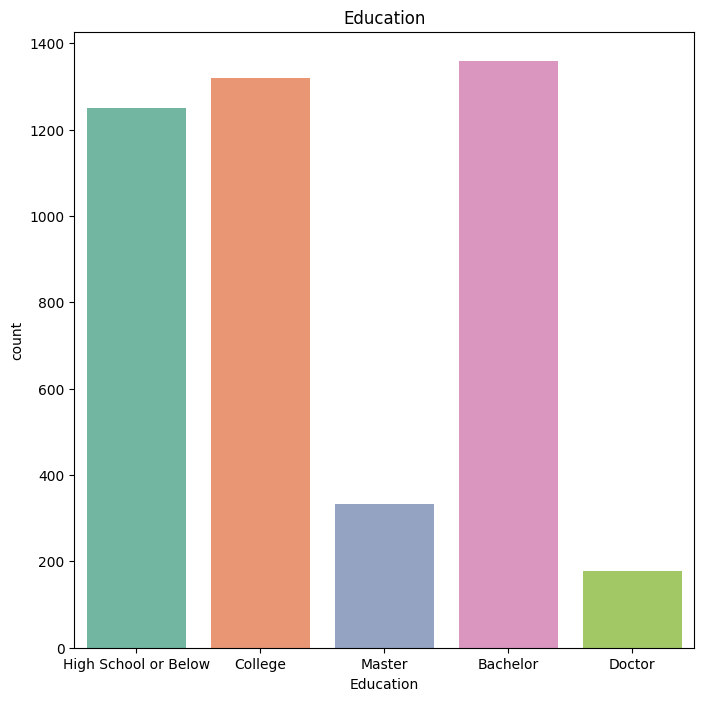

In [52]:
#Seaborn Chart of Education
plt.figure(figsize=(8,8))
sns.countplot(x='Education', data=source, palette='Set2')
plt.title('Education')
plt.show()

Visualizaton below is the same visualization from Education Column with Plotly Library

In [51]:
# #Education
# education_counts = source['Education'].value_counts()

# # Convert the Series to DataFrame for Plotly
# df_education_counts = education_counts.reset_index()
# df_education_counts.columns = ['Education', 'Count']

# # Create a bar chart
# education_fig = px.pie(df_education_counts, names='Education', values='Count', color='Education',
#              title='Education',
#              labels=df_education_counts.columns)
# education_fig.show()

The educational profile of Red customers, as represented in the data, demonstrates a diverse range of educational backgrounds.

* The majority of Red customers have attained Bachelor's or College degrees, reflecting a significant proportion of individuals with higher education qualifications.

* Additionally, a notable portion of Red customers have completed high school or lower levels of education.

* The presence of individuals with Master's and Doctorate degrees suggests a subset of customers with advanced educational achievements.

## Data Preproessing

Data preparation establishes the groundwork for strong machine learning models by ensuring that the data is clean, relevant, and well-formatted for analysis. This critical phase consists of various actions aimed at improving the quality and effectiveness of our predictive models. In this section, I will discuss the various preparation strategies used on our dataset.

* I begin by addressing outliers in the data that might skew analysis and modeling.

* After that, I tackle duplicated data points, ensuring that each observation contributes unique to our learning process.

* Then, I begin investigating multicollinearity inside numerical features, addressing correlations that may confuse our model's interpretation and performance.

* Moving forward, I will explore methods for encoding categorical features, which converting qualitative data into a format appropriate for mathematical analysis.

* Next, I address scaling numerical features to a consistent range to ensure that disparate scales do not have a unreasonable impact for our model.

#### Global Outlier

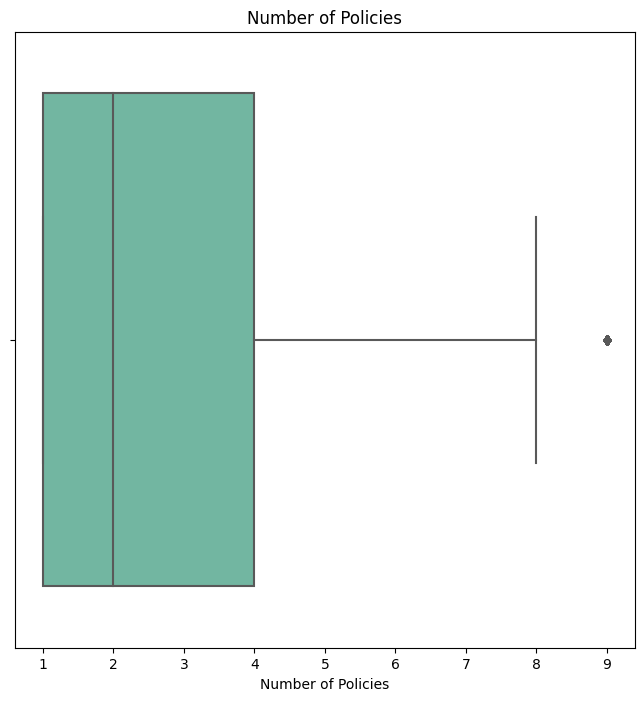

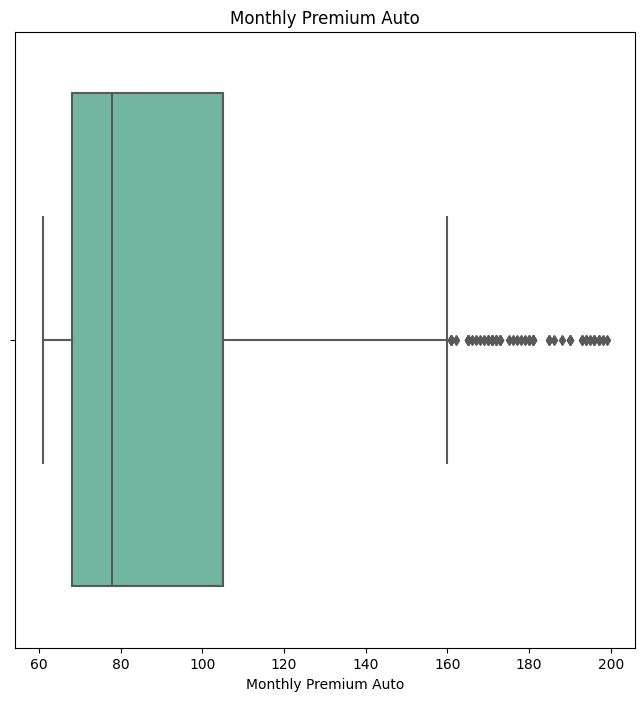

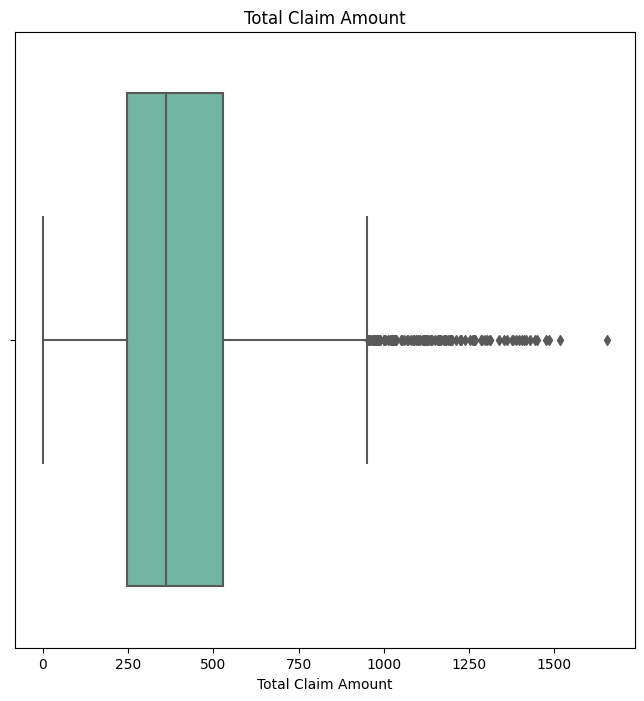

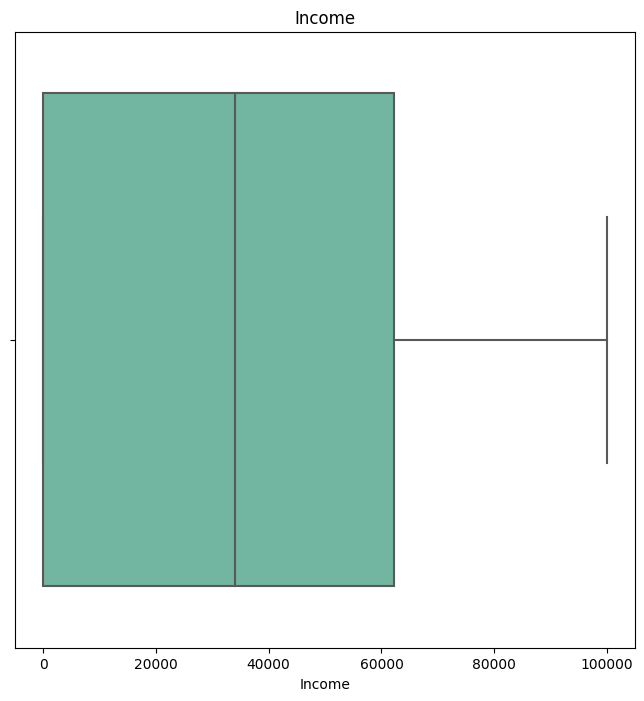

In [47]:
# #Seaborn Boxplot of Numberical Feature
for i in numerical_feature:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=i, data=source, palette='Set2')
    plt.title(i)
    plt.show()

Visualizaton below is the same visualization of Boxplot from Numerical Feature with Plotly Library

In [46]:
# # Create subplots: 2 rows, 2 columns
# boxplot = make_subplots(rows=2, cols=2)

# # Add box plots
# for i, col in enumerate(numerical_feature, start=1):
#     boxplot.add_trace(
#         go.Box(y=source[col], name=col),
#         row=(i-1)//2+1,
#         col=(i-1)%2+1
#     )
# boxplot.update_layout(height=900, width=1200)
# boxplot.show()

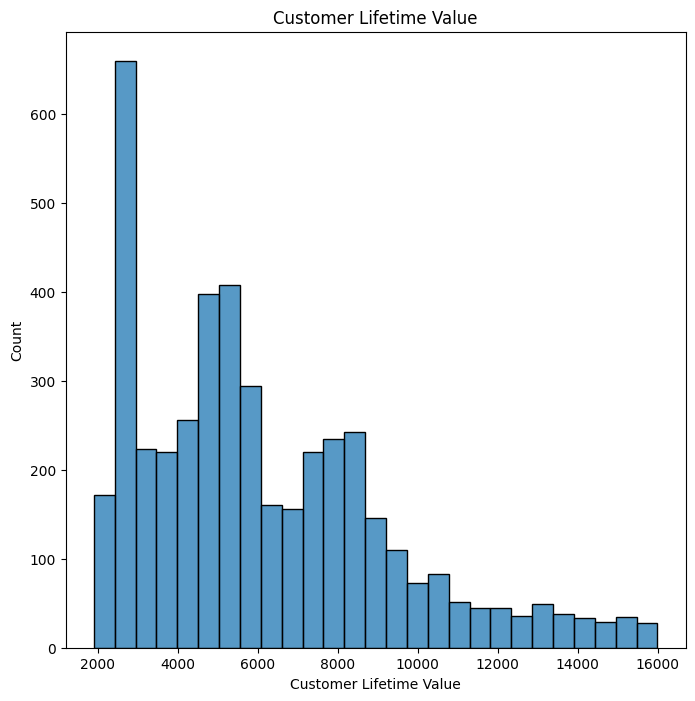

In [45]:
# #Seaborn of CLV Historgram
plt.figure(figsize=(8,8))
sns.histplot(x='Customer Lifetime Value', data=source, palette='Set2')
plt.title('Customer Lifetime Value')
plt.show()

Visualizaton below is the same visualization of histogram from Customer Lifetime Value Column with Plotly Library

In [44]:
#Customer Lifetime Value Histogram
# clv_hist = px.histogram(source, x="Customer Lifetime Value", marginal="box", hover_data=source.columns, title="Customer Lifetime Value")
# clv_hist.show()

#### Contextual Outlier

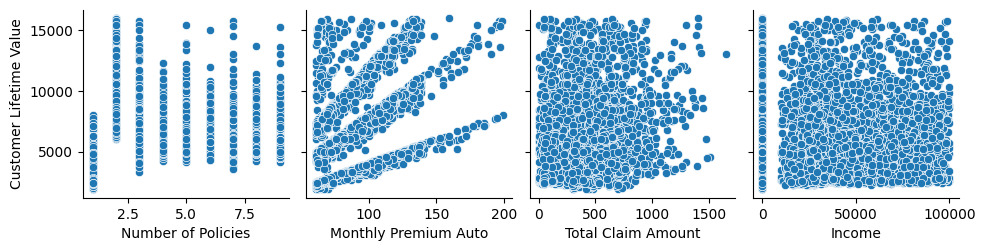

In [43]:
#Make Seaborn Scatterplot Matrix between CLV and Numerical Feature
sns.pairplot(source, x_vars=numerical_feature, y_vars='Customer Lifetime Value', palette='Set2')
plt.show()

Visualizaton below is the same visualization of Scatterplot Matrix between Customer Lifetime Value and Numerical Feature with Plotly Library

In [42]:
# from itertools import cycle

# # Define a cycle of colors
# color_cycle = cycle(go.Figure().layout.template.layout.colorway)
# color_dict = {'Sports Car': 'red', 'Four-Door Car': 'blue', 'SUV': 'green', 'Two-Door Car': 'yellow', 'Luxury Car': 'black', 'Luxury SUV': 'orange'}

# # Make temporary dataframe
# df = source.copy()
# df['Color'] = df['Vehicle Class'].map(color_dict)

# #Make Scatterplot Matrix between numerical features and Customer Lifetime Value
# for feature in numerical_feature:
#     fig = go.Figure()
#     for vehicle_class, color in color_dict.items():
#         df_class = df[df['Vehicle Class'] == vehicle_class]
#         fig.add_trace(go.Scatter(x=df_class[feature], y=df_class['Customer Lifetime Value'], mode='markers', marker_color=color, name=vehicle_class))
#     fig.update_layout(title=f"Scatter plot of Customer Lifetime Value and {feature}", xaxis_title=feature, yaxis_title='Customer Lifetime Value')
#     fig.show()

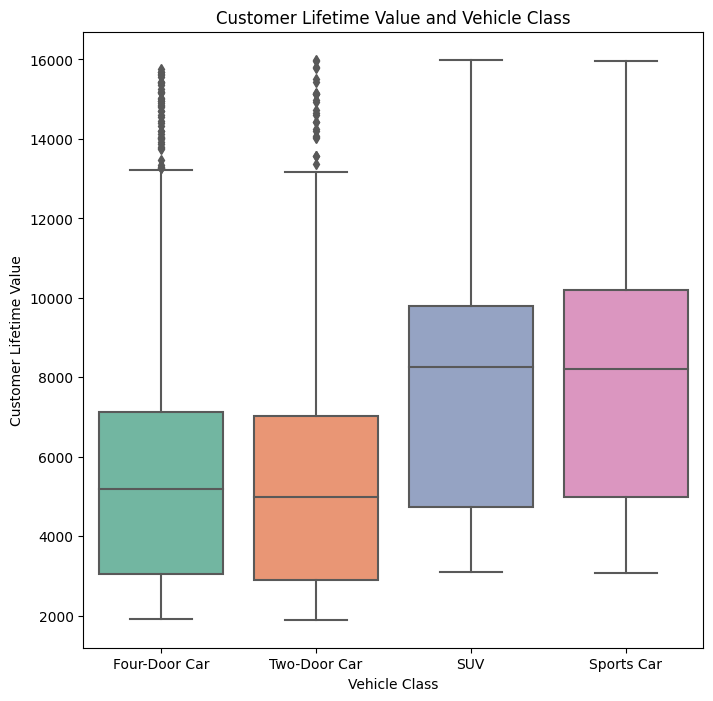

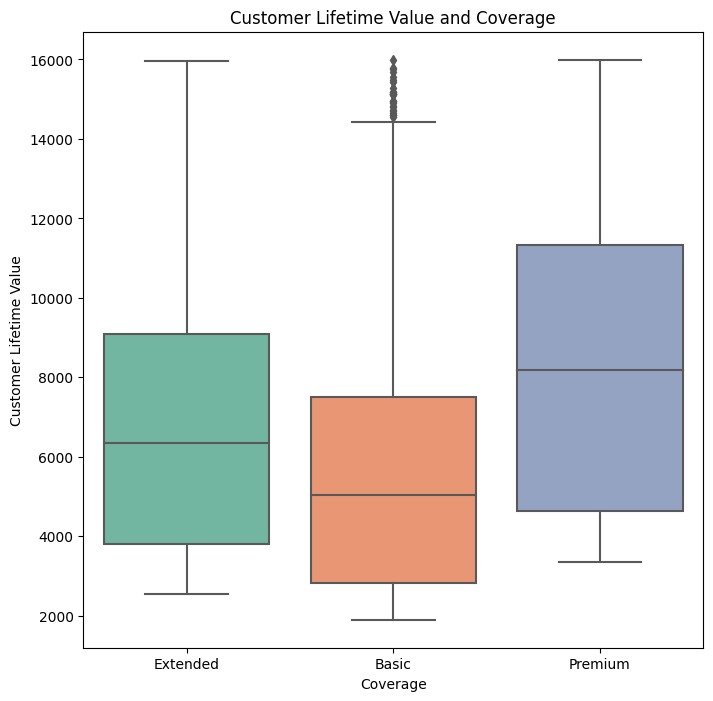

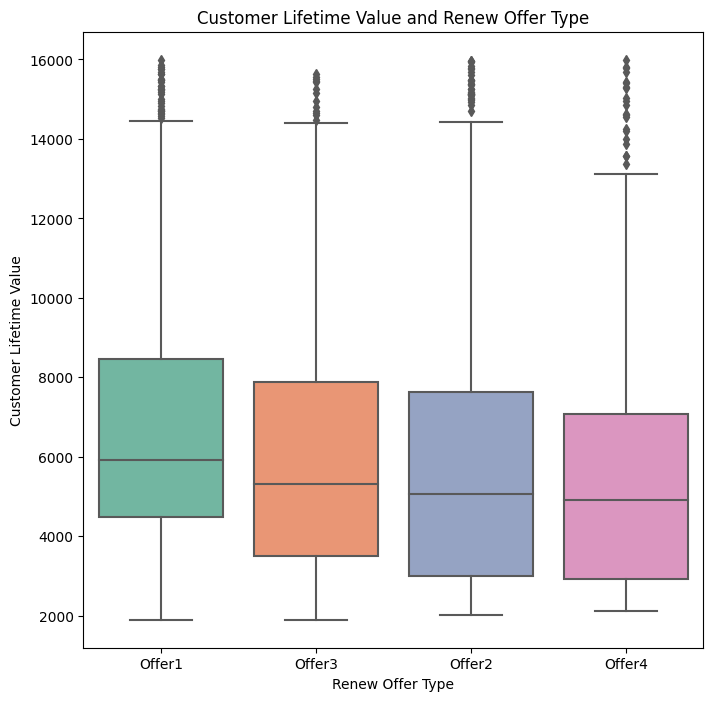

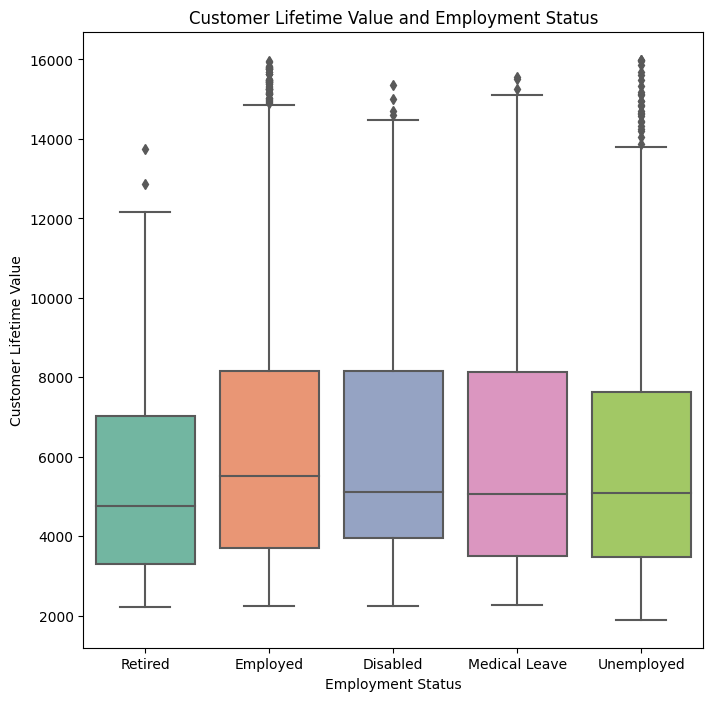

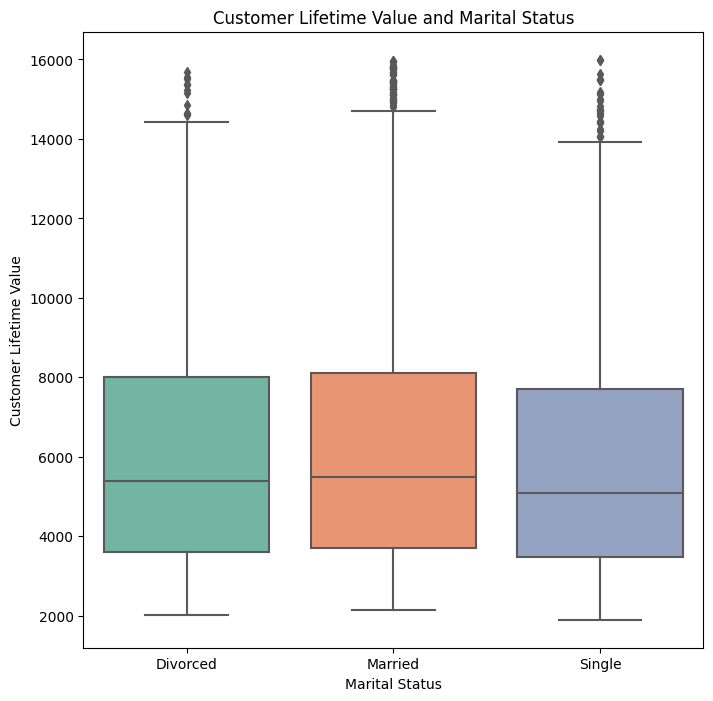

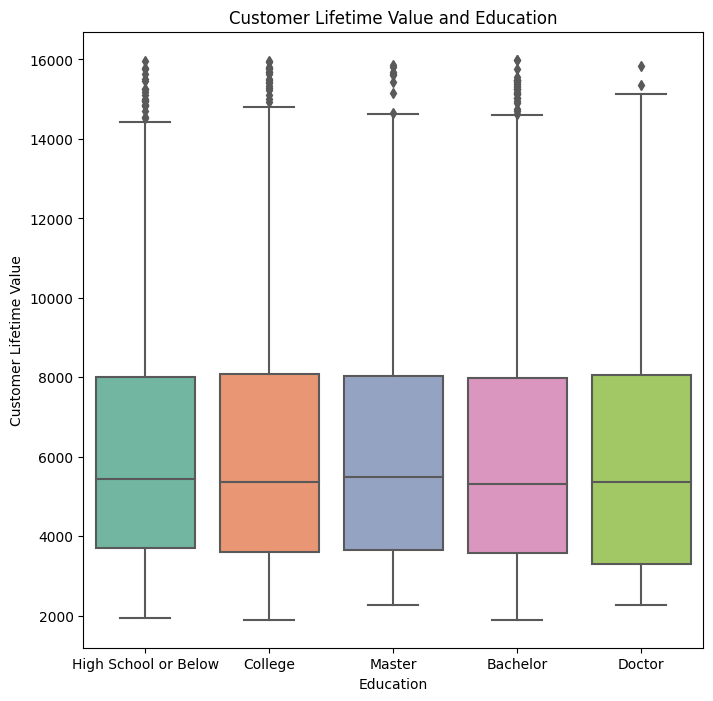

In [41]:
#Make Seaborn Scatterplot Matrix between CLV and Categorical Feature
for feature in categorycal_feature:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=feature, y='Customer Lifetime Value', data=source, palette='Set2')
    plt.title(f"Customer Lifetime Value and {feature}")

Visualizaton below is the same visualization between CLV and Categorical Features with Plotly Library

In [40]:
#Make Scatterplot Matrix between categorical features and Customer Lifetime Value
# for feature in categorycal_feature:
#     fig = go.Figure()
#     for vehicle_class, color in color_dict.items():
#         df_class = df[df['Vehicle Class'] == vehicle_class]
#         fig.add_trace(go.Scatter(x=df_class[feature], y=df_class['Customer Lifetime Value'], mode='markers', marker_color=color, name=vehicle_class))
#     fig.update_layout(title=f"Scatter plot of Customer Lifetime Value and {feature}", xaxis_title=feature, yaxis_title='Customer Lifetime Value')
#     fig.show()

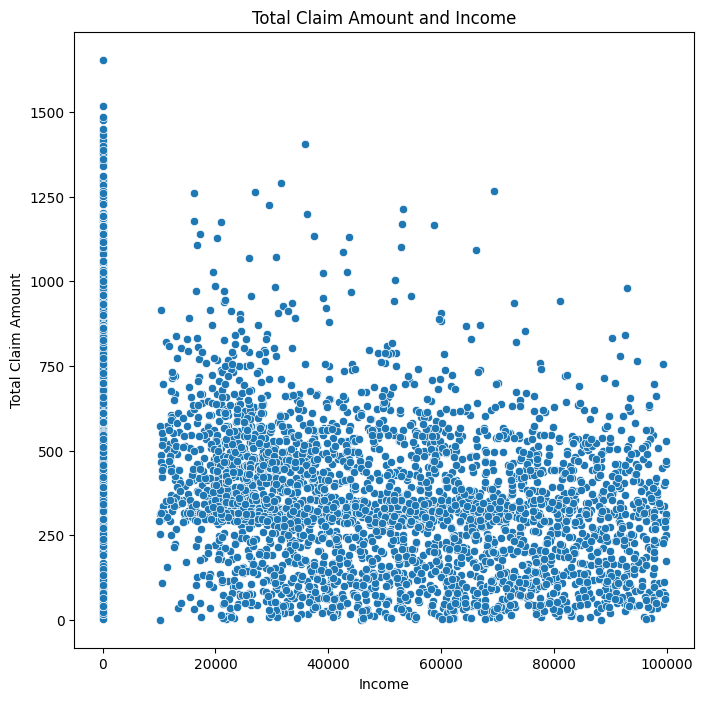

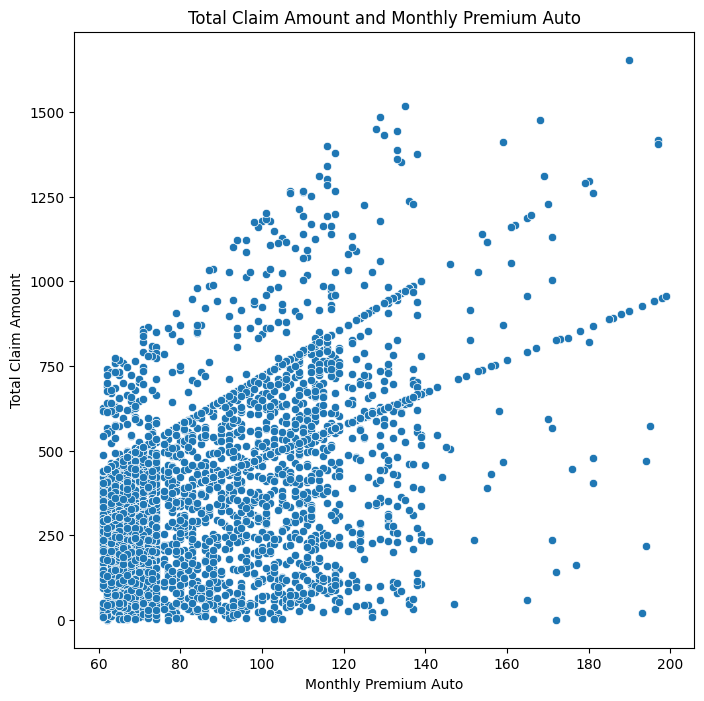

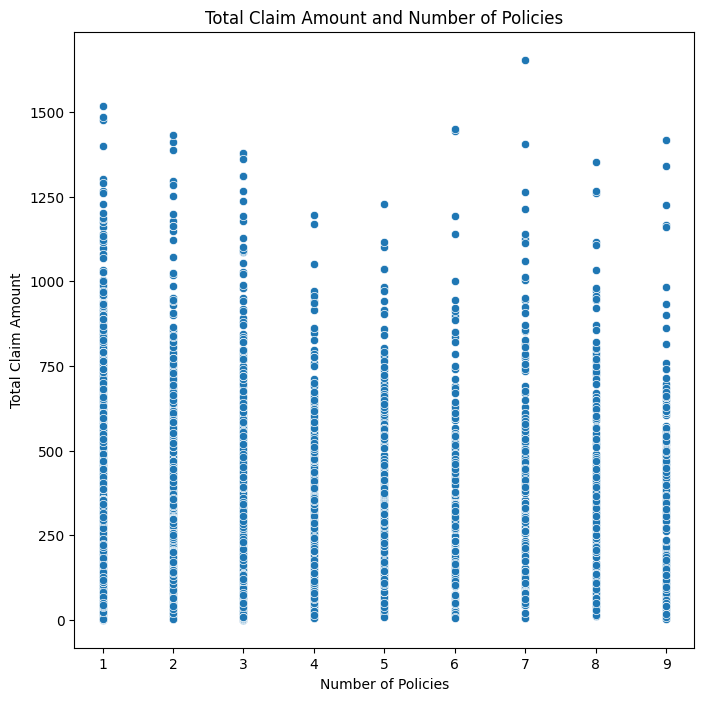

In [39]:
# #Make Seaborn Scatterplot Matrix between Income, Monthly Premium Auto, and Number of Policies with Total Claim Amount
for feature in ['Income', 'Monthly Premium Auto', 'Number of Policies']:
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=feature, y='Total Claim Amount', data=source, palette='Set2')
    plt.title(f"Total Claim Amount and {feature}")
    plt.show()

Visualization below is the same visualization of scatterplot matrix between Income, Monthly Premium Auto, and Number of Policies with Plotly Library

In [38]:
#Make Scatterplot Matrix between Income, Monthly Premium Auto, and Number of Policies with Total Claim Amount

# #Define X Axis
# choosen_matrix = ['Income', 'Monthly Premium Auto', 'Number of Policies']

# #Make Scatterplot Matrix
# for feature in choosen_matrix:
#     hover_text = [f"{feature}: {f_val}<br>Total Claim Amount: {tca_val}<br>Customer Lifetime Value: {clv_val}" 
#                   for f_val, tca_val, clv_val in zip(df[feature], df['Total Claim Amount'], df['Customer Lifetime Value'])]
#     fig = go.Figure(data=go.Scatter(x=df[feature], y=df['Total Claim Amount'], mode='markers', marker_color=df['Color'], hovertext=hover_text, hoverinfo='text'))
#     fig.update_layout(title=f"Scatter plot of Total Claim Amount and {feature}", xaxis_title=feature, yaxis_title='Total Claim Amount')
#     fig.show()

* We can see the outlier are come from Luxury Car and Luxury SUV, the proportion of Luxury SUV and the Luxury Car are so small just 4% in aggregate. That is our **Model Limitation**, the model can't effectively predict the Customer Lifetime Value from Luxury Vehicle because the data of Luxury Vehicle are so limited in this dataset. This happen because the primary segment of Red are Non-Luxury Vehicle.

In [7]:
#Drop the outliers
source = source[~source['Vehicle Class'].isin(['Luxury Car', 'Luxury SUV'])]
print(f'Total data after we drop the outliers {len(source)} data.')

Total data after we drop the outliers 5447 data.


Double Check Outlier After Handling

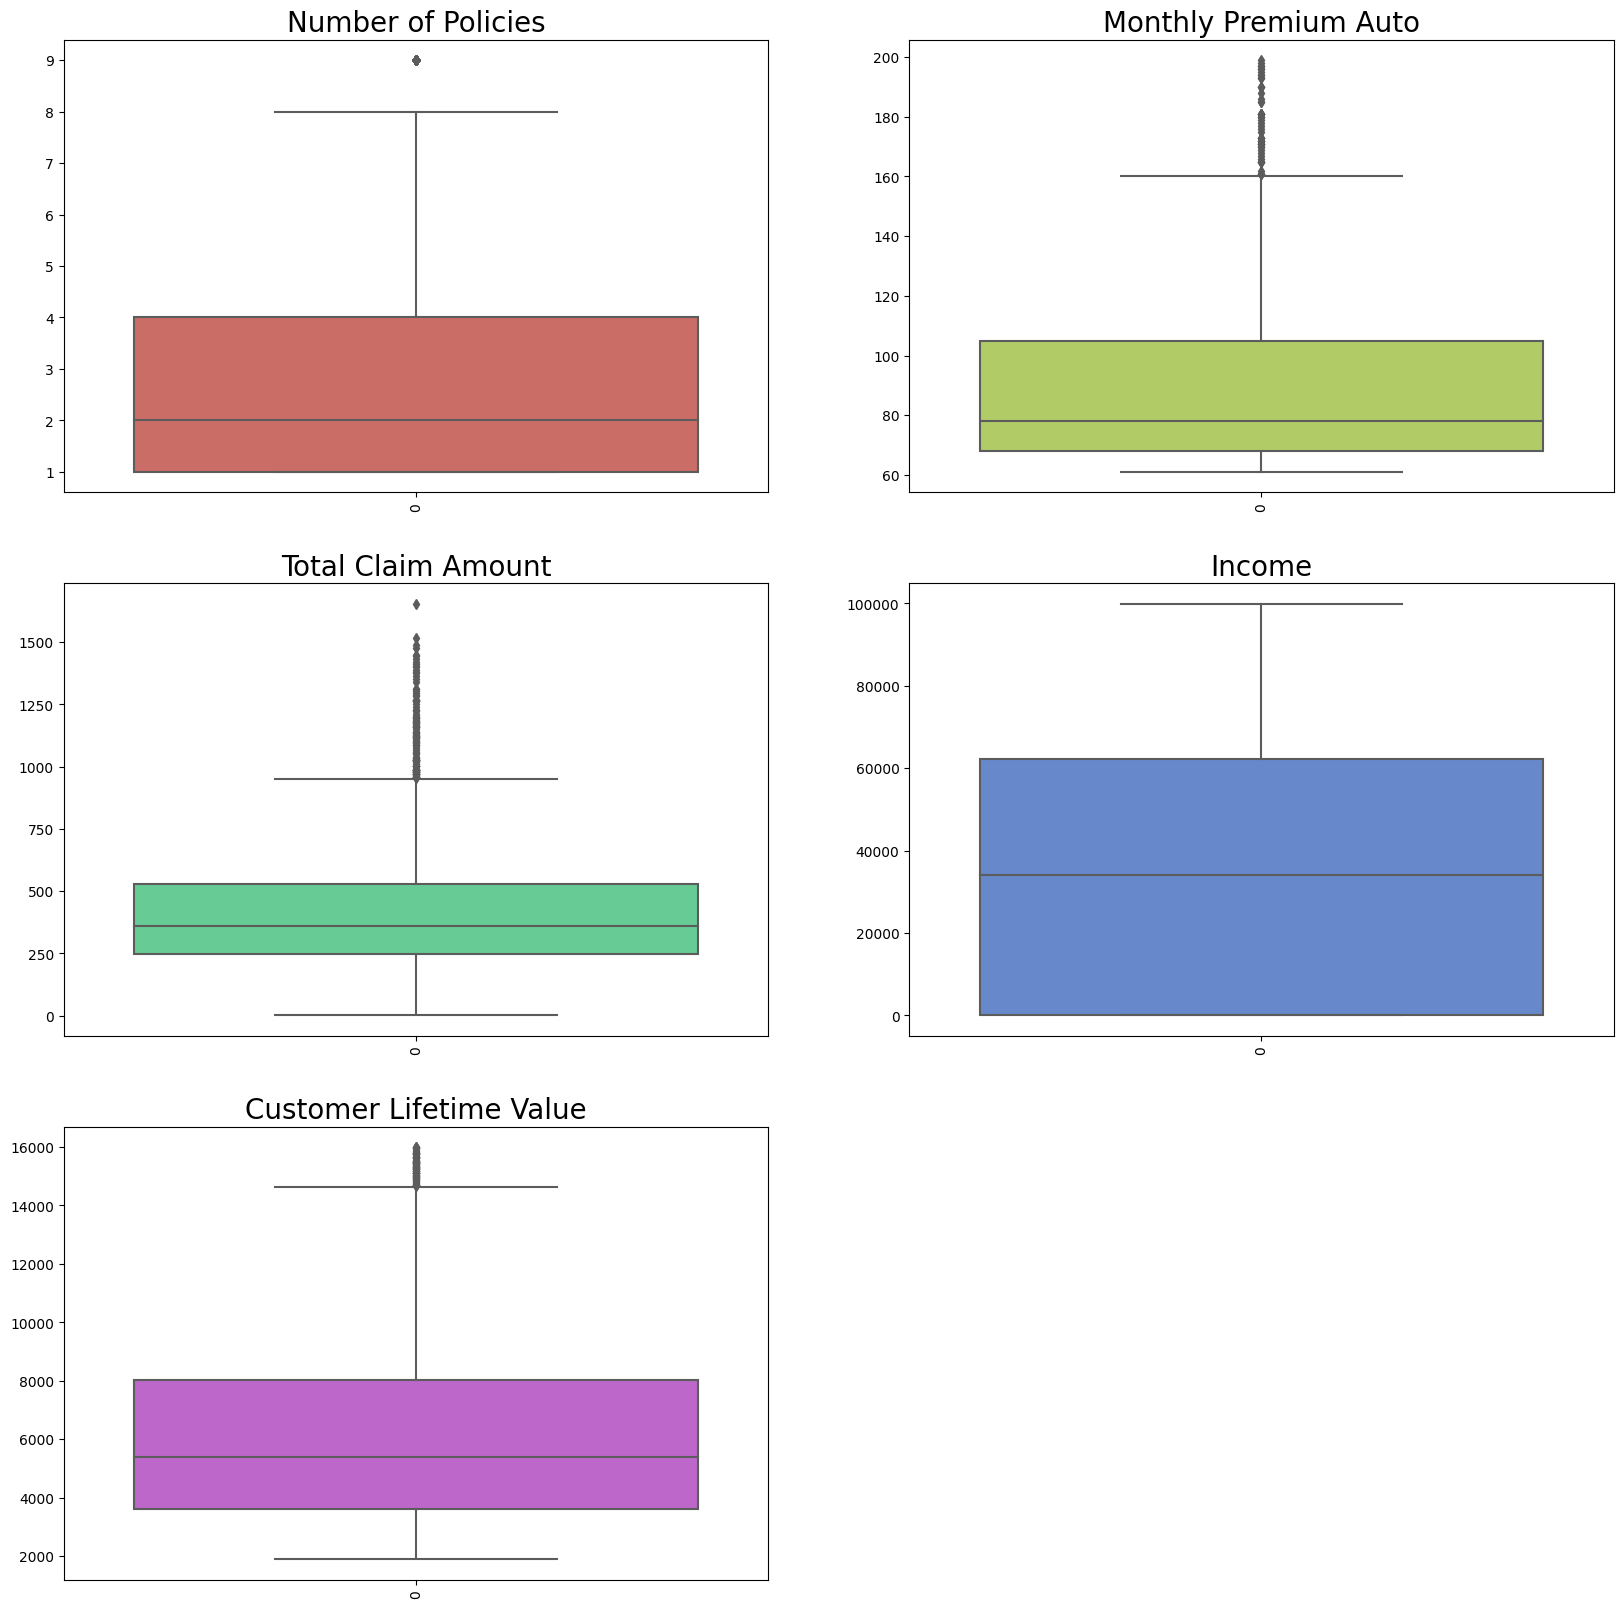

In [37]:
#Slicing the Numeric Column
numeric = source.select_dtypes(include=np.number).columns.tolist()

#Create Seaborn Subplots: 3 rows, 2 columns
sea_box, ax = plt.subplots(3, 2, figsize=(20, 20))

#Create Seaborn Color Palette
palette = sns.color_palette('hls', len(numeric))

#Make Seaborn Boxplot of Numeric Column
for variable, subplot, color in zip(numeric, ax.flatten(), palette):
    sns.boxplot(source[variable], ax=subplot, color=color)
    subplot.set_title(variable, fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#Remove the blank subplot
sea_box.delaxes(ax[2,1])

Visualizaton below is the same visualization the boxplot of numeric coloumns with Plotly Library

In [36]:
# # Create subplots: 3 rows, 2 columns
# boxplot = make_subplots(rows=3, cols=2)

# # Add box plots
# for i, col in enumerate(numeric, start=1):
#     boxplot.add_trace(
#         go.Box(y=source[col], name=col),
#         row=(i-1)//2+1,
#         col=(i-1)%2+1 if i <= 4 else 2
#     )
# boxplot.update_layout(height=1200, width=1200)
# boxplot.show()

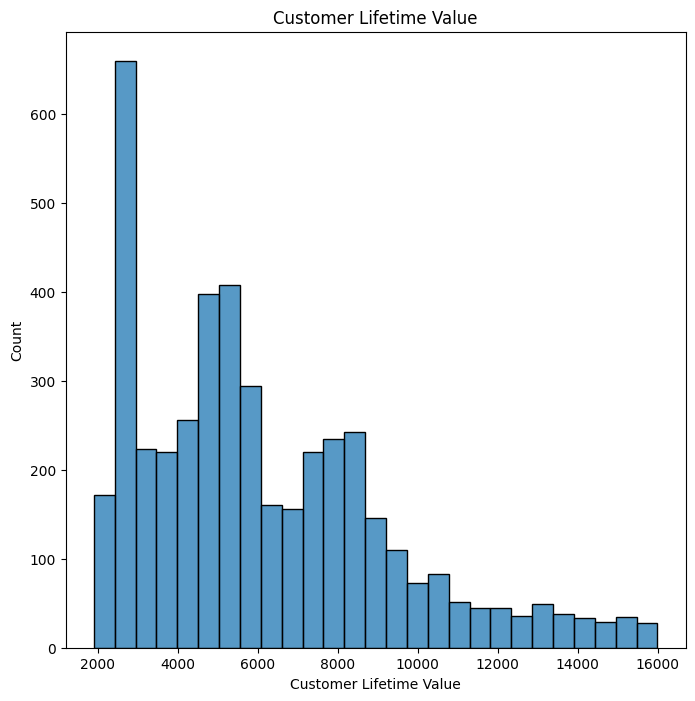

In [35]:
#Seaborn of CLV Historgram
plt.figure(figsize=(8,8))
sns.histplot(x='Customer Lifetime Value', data=source, palette='Set2')
plt.title('Customer Lifetime Value')
plt.show()

Visualizaton below is the same visualization of Histrogram Customer Lifetime Value with Plotly Library

In [34]:
#Customer Lifetime Value Histogram
# clv_hist = px.histogram(source, x="Customer Lifetime Value", marginal="box", hover_data=source.columns, title="Customer Lifetime Value")
# clv_hist.show()

* There is global outlier in Number of Policies column. But the variance of the global outlier from upper fence is just 1 point. We will try to see further the data point.

* Also there are some global outliers in our Target Variable. We will see the amount of he data from this and if the amount are not have significant amount we gonna drop the global outlier.

In [36]:
sample = source[source['Number of Policies'] > 8]
display(sample.describe(), sample.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,189.0,189.000000,189.000000,189.000000,189.000000
mean,9.0,86.682540,340.902382,50079.439153,6815.360928
std,0.0,23.170845,192.284001,24410.105208,1839.799010
min,9.0,61.000000,2.540090,12677.000000,4605.036646
25%,9.0,68.000000,192.879457,28280.000000,5380.898636
50%,9.0,78.000000,331.200000,45732.000000,6057.072080
75%,9.0,107.000000,467.803638,67798.000000,8456.455313
max,9.0,193.000000,1224.563450,99359.000000,15306.224930


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education
count,189,189,189,189,189,189
unique,4,3,4,4,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,108,125,89,158,131,65


* After we look further the data of Number of Policies outlier, the data are considered reasonable. Even, the Total Claim Amount Value and Customer Lifetime Value of this data doesn't belonging the global outliers from those two. This can be happen because it can be the customer who had 9 policies are organization such as company or government institutions. We gonna retain the data point with "9" for the number of policies to maintain data integrity, gain insights into customer behavior, and ensure a robust analysis of the dataset.

In [6]:
#Check the amount data from Customer Lifetime Value Outliers
clv_outliers = source[source['Customer Lifetime Value'] > 16000]
print(f'Total data from Customer Lifetime Value Outliers is {round(((len(clv_outliers)/len(source))*100), 2)}% data.')

Total data from Customer Lifetime Value Outliers is 8.43% data.


In [8]:
#Drop Customer Lifetime Value Global Outliers
source.drop(source[source['Customer Lifetime Value'] > 16000].index, inplace=True)

print(f'Total data after we drop the outliers is {len(source)} data.')

Total data after we drop the outliers is 4988 data.


### Duplicated Data

In [8]:
#Check Duplicate Data
print(f'Total duplicate data is {source.duplicated().sum()} data.')

Total duplicate data is 547 data.


* Duplicates in a dataset, such as the 547 duplicated entries identified here, can introduce bias and skew statistical analyses. By dropping duplicate data, I ensure the integrity and representativeness of our dataset, allowing for more accurate model training and reliable insights into the underlying patterns of the data.

In [9]:
#Drop Duplicate Data and Keep the First Data
source.drop_duplicates(inplace=True)
source.reset_index(drop=True, inplace=True)
print(f'Total data after we drop the duplicate data {len(source)} data.')

Total data after we drop the duplicate data 4441 data.


### Multicolinearity Check

* Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. This can cause issues in the model because it becomes difficult to separate out the individual effects of each predictor variable on the target variable.

* Variable Inflation Factor (VIF) is a measure that quantifies the severity of multicollinearity in a regression analysis. It calculates how much the variance of an estimated regression coefficient is inflated due to multicollinearity in the model.

* If the VIF for a particular variable is high, it suggests that the variable is highly correlated with other predictor variables in the model, making it difficult to interpret its individual effect on the target variable.

In [10]:
#Check VIF on Numerical Features
X_vif = source[numerical_feature]
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
1,Monthly Premium Auto,10.937956
2,Total Claim Amount,6.263143
3,Income,2.803143
0,Number of Policies,2.338641


We can see the Monthly Premium Auto feature has the highest VIF value indicates that it is strongly correlated with one or more of the other numerical features.

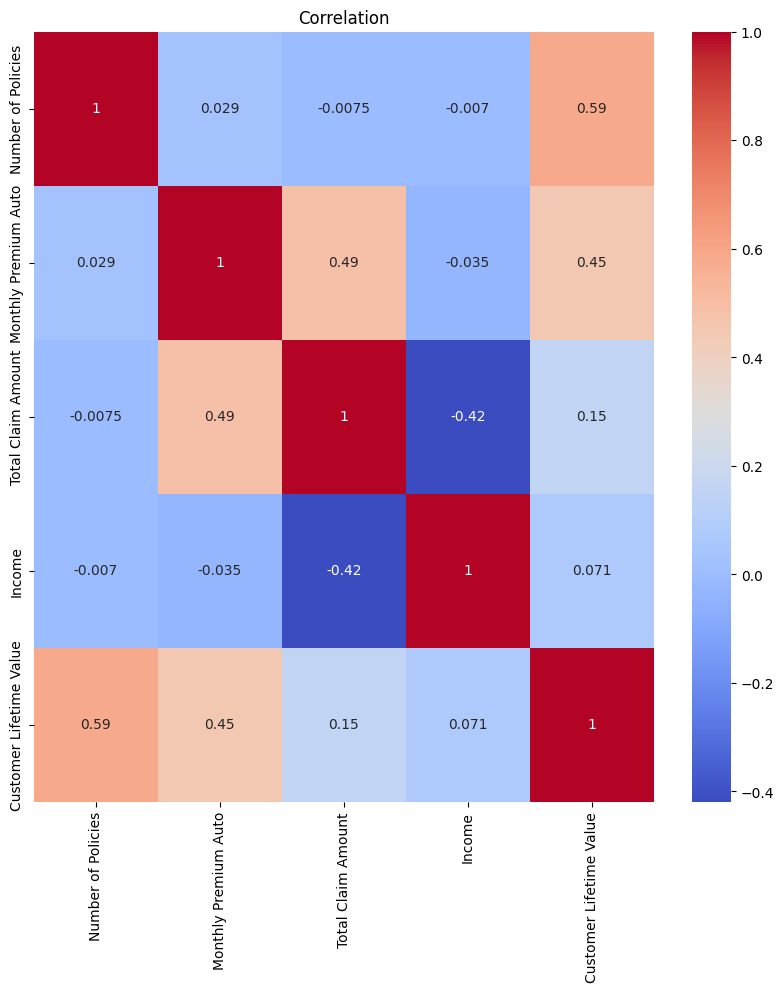

In [33]:
corr = source.corr(method='spearman')

# Seaborn Heatmap of Correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

Visualizaton below is the same visualization of Heatmap Correlation with Plotly Library

In [32]:
# #Heatmap of Correlation with Plotly
# fig = go.Figure(data=go.Heatmap(
#                    z=corr,
#                    x=corr.columns,
#                    y=corr.columns,
#                    hoverongaps = False,
#                    colorscale='Viridis',
#                    text = np.around(corr.values, decimals=2),
#                    hoverinfo='text'))
# # Add annotations for correlation values
# annotations = []
# for i, row in enumerate(corr.values):
#     for j, value in enumerate(row):
#         annotations.append(go.layout.Annotation(
#             x=corr.columns[j], y=corr.columns[i], text=str(round(value, 2)), showarrow=False, font=dict(color='red' if abs(value) > 0.5 else 'white')))

# fig.update_layout(title='Correlation Heatmap', annotations=annotations)
# fig.show()

* During the exploration of multicollinearity and correlation patterns among our numerical features — Number of Policies, Total Claim Amount, Income, and Monthly Premium Auto — we observed a notable issue. Monthly Premium Auto exhibits a high Variance Inflation Factor (VIF) value of 10.93, indicating a strong correlation with other predictors. Moreover, our correlation heatmap reveals a significant correlation between Monthly Premium Auto and Total Claim Amount.

* Given the high VIF value and the substantial correlation observed, retaining Monthly Premium Auto could lead to multicollinearity issues and redundant information within our model. Consequently, to ensure the independence of predictors and mitigate the risk of multicollinearity, we have made the decision to exclude Monthly Premium Auto from our feature set. This strategic choice aims to enhance the interpretability and stability of our predictive model, allowing for more reliable and accurate insights into the relationships between our predictors and the target variable.

In [11]:
numerical_feature = ['Number of Policies', 'Total Claim Amount', 'Income']
#Check again VIF on Numerical Features
X_vif = source[numerical_feature]
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
0,Number of Policies,2.139584
1,Total Claim Amount,1.898403
2,Income,1.639139


* Upon its removal, the VIF values of the remaining numerical features, including Number of Policies, Total Claim Amount, and Income, decreased notably. None of the VIF values for these features exceeded the threshold of 2.5, signifying a substantial reduction in multicollinearity concerns.

* This reduction in VIF values suggests that the exclusion of Monthly Premium Auto has effectively mitigated the issue of multicollinearity within our dataset. With lower VIF values, our model's coefficients become more stable, making the interpretation of the relationships between predictors and the target variable more reliable.

* By addressing multicollinearity through the strategic removal of Monthly Premium Auto, we have improved the robustness and interpretability of our predictive model, thereby enhancing its predictive performance and overall reliability.

**Category Features Encoding & Numerical Features Scaler**

Encoding categorical features is an essential step in preparing data for machine learning models, including regression models.

* Machine learning algorithms typically work with numerical data. Categorical variables, such as Vehicle Class, Coverage, Renew Offer Type, Employment Status, Marital Status, and Education, are non-numeric in nature. Encoding these categorical variables into numerical representations allows machine learning algorithms to process and learn from them.

Scaling numerical features is a critical preprocessing step aimed at standardizing the range of values across different features.

* By scaling numerical features, I ensure that each feature contributes proportionally to the model training process, preventing features with larger scales from dominating the learning algorithm. TThis process improves the rate of certain optimization algorithms, improves model performance, and facilitates the interpretability of model coefficients. Ultimately, scaling numerical features optimizes the efficiency and effectiveness of our machine learning models, ensuring more accurate predictions and robust insights.

In [44]:
cat = []
for i in categorycal_feature:
    cat.append([i, source[i].nunique(), source[i].unique()])
cat = pd.DataFrame(cat, columns=['Feature', 'Unique', 'Value'])
pd.set_option('display.max_colwidth', None)
cat

,Feature,Unique,Value
0,Vehicle Class,4,"[Four-Door Car, Two-Door Car, SUV, Sports Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,Employment Status,4,"[Retired, Employed, Disabled, Medical Leave]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"


In [10]:
#Define Mapping for Ordinal Encoding
coverage_mapping = {None: 0, 'Basic': 1, 'Extended': 2, 'Premium': 3}
education_mapping = {None: 0, 'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5}

#Define Ordinal Encoder
ordinal_encoder_alpha = ce.OrdinalEncoder(mapping=[{'col': 'Coverage', 'mapping': coverage_mapping},
                                             {'col': 'Education', 'mapping': education_mapping}])

ordinal_encoder_beta = ce.OrdinalEncoder(mapping=[{'col': 'Education', 'mapping': education_mapping}])

#Define Transformer
optimus_prime = ColumnTransformer([
    ('Optimus Prime OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Optimus Prime Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Optimus Prime MinMaX', MinMaxScaler(), ['Income']),
    ('Optimus Prime Robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount'])
])
bumblebee = ColumnTransformer([
    ('Bumblebee OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Bumblebee Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Bumblebee Standard', StandardScaler(), ['Income']),
    ('Bumblebee Robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount'])
])
ratchet = ColumnTransformer([
    ('Ratchet OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Ratchet Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Ratchet MinMax', MinMaxScaler(), ['Income', 'Number of Policies']),
    ('Ratchet Robust', RobustScaler(), ['Monthly Premium Auto', 'Total Claim Amount'])
])
ironhide = ColumnTransformer([
    ('Ironhide OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Ironhide Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Ironhide Standard', StandardScaler(), ['Income', 'Number of Policies']),
    ('Ironhide Robust', RobustScaler(), ['Total Claim Amount'])
])
jazz = ColumnTransformer([
    ('Jazz OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Jazz Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Jazz MinMax', MinMaxScaler(), ['Income']),
    ('Jazz Standard', StandardScaler(), ['Number of Policies']),
    ('Jazz Robust', RobustScaler(), ['Total Claim Amount'])
])
megatron = ColumnTransformer([
    ('Megatron OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Megatron Ordinal', ordinal_encoder_beta, ['Education']),
    ('Megatron MinMax', MinMaxScaler(), ['Income']),
    ('Megatron Robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount'])
])
sentinel_prime = ColumnTransformer([
    ('Sentinel Prime OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Sentinel Prime Ordinal', ordinal_encoder_beta, ['Education']),
    ('Sentinel Prime Standard', StandardScaler(), ['Income']),
    ('Sentinel Prime Robust', RobustScaler(), ['Total Claim Amount'])
])
sideswipe = ColumnTransformer([
    ('Sideswipe OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Sideswipe Ordinal', ordinal_encoder_beta, ['Education']),
    ('Sideswipe MinMax', MinMaxScaler(), ['Income', 'Number of Policies']),
    ('Sideswipe Robust', RobustScaler(), ['Total Claim Amount'])
])
skids = ColumnTransformer([
    ('Skids OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Skids Ordinal', ordinal_encoder_beta, ['Education']),
    ('Skids Standard', StandardScaler(), ['Income', 'Number of Policies']),
    ('Skids Robust', RobustScaler(), ['Total Claim Amount'])
])
mudflap = ColumnTransformer([
    ('Mudflap OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Mudflap Ordinal', ordinal_encoder_beta, ['Education']),
    ('Mudflap MinMax', MinMaxScaler(), ['Income']),
    ('Mudflap Standard', StandardScaler(), ['Number of Policies']),
    ('Mudflap Robust', RobustScaler(), ['Total Claim Amount'])
])

#Make List of Transformer
transformer = [optimus_prime, bumblebee, ratchet, ironhide, jazz, megatron, sentinel_prime, sideswipe, skids, mudflap]

In [11]:
#Define X and Y
X = source.drop(['Customer Lifetime Value', 'Monthly Premium Auto'], axis=1)
Y = source['Customer Lifetime Value']

## Machine Learning Modelling

In the modeling phase, i conduct a comprehensive model benchmarking procedure to identify the most suitable algorithms and configurations for our dataset.

* Initially, i perform column transformer benchmarking, where i apply various preprocessing strategies to our data and assess their performance across a range of candidate models, including Linear Regression, Ridge Regression, Lasso Regression, KNN Regressor, Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor, Light Gradient Boost Regressor, and Gradient Boost Regressor. Through this process, i determine the best column transformer for each model, optimizing feature preprocessing tailored to the specific requirements of each algorithm.

* Next, i proceed to model benchmarking using GridSearch. I explore a predefined parameter grid for each model, evaluating performance metrics to identify the optimal hyperparameters and model configurations.

* Finally, once i have identified the best-performing model through GridSearch, i further refine its performance through hyperparameter tuning. This iterative process involves fine-tuning the model's hyperparameters to enhance its predictive accuracy and generalization capabilities.

By systematically evaluating and optimizing our models through column transformer benchmarking, model benchmarking, and hyperparameter tuning, i strive to develop a robust and reliable machine learning solution tailored to the nuances of our dataset, ultimately delivering accurate predictions and actionable insights.

In [12]:
#Splitting Dataset
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2020)

#Define Base Model

#Linear Regression
base_linreg = LinearRegression()

#Ridge
base_ridge = Ridge()

#Lasso
base_lasso = Lasso()

#KNN Regressor
base_knn = KNeighborsRegressor()

#Decision Tree Regressor
base_dt = DecisionTreeRegressor(random_state=2020)

#Random Forest Regressor
base_rf = RandomForestRegressor(random_state=2020)

#XGBoost Regressor
base_xgb = XGBRegressor(random_state=2020)

#LightGBM Regressor
base_lgbm = LGBMRegressor(random_state=2020)

#Gradient Boosting Regressor
base_gb = GradientBoostingRegressor(random_state=2020)

#SVR
base_svr = SVR()

#Define Cross Validation & Scoring
cv = KFold(n_splits=10, shuffle=True, random_state=2020)
scoring = ['neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_mean_squared_error']

#Define Column Transformer Space
transformer_grid = {
    'preprocess': transformer
}

#Column Name for Transformer Result
transformer_benchmark_column = ['Rank (Based on MSLE)', 'Column Transformer', 'Mean MSLE', 'STD MSLE', 'Mean MAPE', 'STD MAPE','Mean MAE', 'STD MAE','Mean MSE', 'STD MSE']

### Model Benchmarking

**Column Transformer Benchmarking**

First, we will find the best fit Column Transformer for the default condition for each **Regression Models**.

**Linear Regression**

In [15]:
#Define Linear Model for Column Transformer Benchmarking
linear_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_linreg)
])

#GridSearchCV for Linear Model Column Transformer Benchmarking
linear_benchmark = GridSearchCV(
    estimator=linear_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Linear Model Column Transformer Benchmarking
linear_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Sta...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [16]:
# Show the result Column Transformer Benchmark for Linear Model
linear_benchmark_result = pd.DataFrame(linear_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
linear_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
linear_benchmark_result['Column Transformer'] = linear_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
linear_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
linear_benchmark_result.reset_index(drop=True, inplace=True)
linear_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.175505,0.007074,-0.375627,0.007680,-1989.677646,52.612319,-7.049651e+06,528611.221528
1,1,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.175505,0.007074,-0.375627,0.007680,-1989.677646,52.612319,-7.049651e+06,528611.221528
2,1,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.175505,0.007074,-0.375627,0.007680,-1989.677646,52.612319,-7.049651e+06,528611.221528
3,4,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.175505,0.007074,-0.375627,0.007680,-1989.677646,52.612319,-7.049651e+06,528611.221528
4,5,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.175656,0.007092,-0.375785,0.007314,-1990.044495,53.881766,-7.055441e+06,539142.024314
5,5,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.175656,0.007092,-0.375785,0.007314,-1990.044495,53.881766,-7.055441e+06,539142.024314
6,5,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.175656,0.007092,-0.375785,0.007314,-1990.044495,53.881766,-7.055441e+06,539142.024314
7,8,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.175656,0.007092,-0.375785,0.007314,-1990.044495,53.881766,-7.055441e+06,539142.024314
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.209241,0.006708,-0.434605,0.010323,-2130.635378,58.950354,-7.628183e+06,455853.443084
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Define Linear Model
LinReg = Pipeline([
    ('preprocess', bumblebee),
    ('model', base_linreg)
])

**Ridge Regression**

In [18]:
#Define Ridge Model for Column Transformer Benchmarking
ridge_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_ridge)
])

#GridSearchCV for Ridge Model
ridge_benchmark = GridSearchCV(
    estimator=ridge_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Ridge Column Transformer Benchmarking
ridge_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Op...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [19]:
# Show the result Column Transformer Benchmark for Ridge Model
ridge_benchmark_result = pd.DataFrame(ridge_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
ridge_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
ridge_benchmark_result['Column Transformer'] = ridge_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
ridge_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
ridge_benchmark_result.reset_index(drop=True, inplace=True)
ridge_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.175538,0.007078,-0.375783,0.007684,-1990.064939,52.590684,-7.049356e+06,528717.291731
1,2,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.175539,0.007076,-0.375784,0.007683,-1990.060880,52.587028,-7.049309e+06,528690.261345
2,3,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.175542,0.007077,-0.375788,0.007684,-1990.060790,52.590019,-7.049356e+06,528702.168889
3,4,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.175542,0.007076,-0.375789,0.007684,-1990.056731,52.586363,-7.049310e+06,528675.136468
4,5,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.175703,0.007084,-0.375999,0.007321,-1990.575464,53.770962,-7.055074e+06,538866.884246
5,6,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.175703,0.007082,-0.376000,0.007320,-1990.572942,53.765556,-7.055026e+06,538842.569653
6,7,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.175706,0.007082,-0.376005,0.007320,-1990.568772,53.764691,-7.055026e+06,538827.064890
7,8,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.175767,0.007079,-0.376100,0.007331,-1990.492321,53.747031,-7.055041e+06,538528.585831
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.209288,0.006713,-0.434732,0.010325,-2130.935539,58.855788,-7.627787e+06,455555.993635
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Define Ridge Model
RidgeRegressor = Pipeline([
    ('preprocess', ironhide),
    ('model', base_ridge)
])

**Lasso Regression**

In [21]:
#Define Lasso Model for Column Transformer Benchmarking
lasso_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_lasso)
])

#GridSearchCV for Lasso Model
lasso_benchmark = GridSearchCV(
    estimator=lasso_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Lasso Column Transformer Benchmarking
lasso_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Op...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [22]:
# Show the result Column Transformer Benchmark for Lasso Model
lasso_benchmark_result = pd.DataFrame(lasso_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
lasso_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
lasso_benchmark_result['Column Transformer'] = lasso_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
lasso_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
lasso_benchmark_result.reset_index(drop=True, inplace=True)
lasso_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.175539,0.007071,-0.375882,0.007648,-1990.038173,52.664216,-7.047314e+06,528455.313884
1,2,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.175546,0.007071,-0.375892,0.007650,-1990.030091,52.662927,-7.047315e+06,528426.455804
2,3,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.175547,0.007055,-0.375893,0.007646,-1990.034973,52.626219,-7.047320e+06,528110.536932
3,4,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.175554,0.007055,-0.375903,0.007647,-1990.026892,52.624940,-7.047321e+06,528081.653059
4,5,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.175708,0.007075,-0.376115,0.007278,-1990.580447,53.888832,-7.053045e+06,538877.415890
5,6,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.175716,0.007058,-0.376128,0.007273,-1990.590982,53.834938,-7.053039e+06,538548.717019
6,7,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.175723,0.007058,-0.376137,0.007274,-1990.583389,53.833040,-7.053040e+06,538519.105343
7,8,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.175782,0.007055,-0.376229,0.007285,-1990.511439,53.814623,-7.053060e+06,538234.056474
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.209260,0.006696,-0.434759,0.010289,-2130.731931,58.773191,-7.625427e+06,455409.352103
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Define Lasso Model
LassoRegressor = Pipeline([
    ('preprocess', ironhide),
    ('model', base_lasso)
])

**KNN Regressor**

In [24]:
#Define KNN Model for Column Transformer Benchmarking
knn_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_knn)
])

#GridSearchCV for KNN Model
knn_benchmark = GridSearchCV(
    estimator=knn_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit KNN Column Transformer Benchmarking
knn_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          '...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [25]:
# Show the result Column Transformer Benchmark for KNN Model
knn_benchmark_result = pd.DataFrame(knn_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
knn_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
knn_benchmark_result['Column Transformer'] = knn_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
knn_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
knn_benchmark_result.reset_index(drop=True, inplace=True)
knn_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.147366,0.014852,-0.299219,0.015864,-1657.953423,85.939145,-6.208447e+06,626621.885132
1,2,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.149227,0.014486,-0.301066,0.016046,-1678.583000,78.015810,-6.308787e+06,596274.901584
2,3,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.160729,0.016252,-0.320241,0.017312,-1746.726534,91.995879,-6.621216e+06,695729.981354
3,4,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.161615,0.016076,-0.320449,0.018144,-1758.431103,89.926040,-6.680583e+06,666226.616983
4,5,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.161767,0.009347,-0.321642,0.013900,-1748.634552,65.956174,-6.597532e+06,468061.192676
5,6,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.164415,0.009067,-0.323830,0.015495,-1775.549145,60.956452,-6.741040e+06,410552.252121
6,7,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.178398,0.010138,-0.346114,0.015412,-1851.603457,76.335845,-7.112456e+06,490003.137851
7,8,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.214303,0.014614,-0.408066,0.017391,-2118.701878,81.964668,-8.267644e+06,595758.952477
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.247684,0.013720,-0.464146,0.020803,-2358.890623,86.378175,-9.176185e+06,572049.652751
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Define KNN Model
knn = Pipeline([
    ('preprocess', jazz),
    ('model', base_knn)
])

**Decision Tree Regressor**

In [54]:
#Define Decision Tree Model for Column Transformer Benchmarking
dt_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_dt)
])

#GridSearchCV for Decision Tree Model
dt_benchmark = GridSearchCV(
    estimator=dt_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Decision Tree Column Transformer Benchmarking
dt_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [55]:
# Show the result Column Transformer Benchmark for Decision Tree Model
dt_benchmark_result = pd.DataFrame(dt_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
dt_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
dt_benchmark_result['Column Transformer'] = dt_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
dt_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
dt_benchmark_result.reset_index(drop=True, inplace=True)
dt_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.018470,0.002220,-0.087397,0.004464,-608.549491,31.906765,-1.587728e+06,2.451294e+05
1,1,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.018470,0.002220,-0.087397,0.004464,-608.549491,31.906765,-1.587728e+06,2.451294e+05
2,3,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.018476,0.002218,-0.087424,0.004440,-608.575255,31.813490,-1.587839e+06,2.443270e+05
3,3,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.018476,0.002218,-0.087424,0.004440,-608.575255,31.813490,-1.587839e+06,2.443270e+05
4,5,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.018603,0.002102,-0.087753,0.003994,-612.593645,27.112515,-1.603479e+06,2.353536e+05
5,6,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.018608,0.002114,-0.087830,0.003988,-612.930205,27.259132,-1.603612e+06,2.351737e+05
6,7,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.018616,0.002103,-0.087842,0.003957,-613.071330,27.183165,-1.604046e+06,2.347824e+05
7,8,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.018620,0.002103,-0.087853,0.003979,-613.115180,27.304596,-1.604179e+06,2.347784e+05
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.408999,0.026442,-0.577627,0.030765,-2970.855185,152.651475,-1.596815e+07,1.190042e+06
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Define Decision Tree Model
dt = Pipeline([
    ('preprocess', optimus_prime),
    ('model', base_dt)
])

**Random Forest Regressor**

In [57]:
#Define Random Forest Model for Column Transformer Benchmarking
rf_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_rf)
])

#GridSearchCV for Random Forest Model
rf_benchmark = GridSearchCV(
    estimator=rf_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Random Forest Column Transformer Benchmarking
rf_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        RandomForestRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [58]:
# Show the result Column Transformer Benchmark for Random Forest Model
rf_benchmark_result = pd.DataFrame(rf_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
rf_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
rf_benchmark_result['Column Transformer'] = rf_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
rf_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
rf_benchmark_result.reset_index(drop=True, inplace=True)
rf_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.011049,0.001873,-0.069576,0.003130,-491.153469,37.454635,-9.065266e+05,210591.534384
1,2,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.011049,0.001873,-0.069577,0.003130,-491.159013,37.459042,-9.065364e+05,210594.969476
2,3,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.011050,0.001873,-0.069572,0.003138,-491.100478,37.485458,-9.065273e+05,210610.553398
3,4,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.011050,0.001873,-0.069573,0.003139,-491.106022,37.489871,-9.065372e+05,210613.988820
4,5,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.011093,0.001786,-0.069550,0.002732,-491.889713,33.597422,-9.143792e+05,197902.162737
5,6,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.011093,0.001788,-0.069547,0.002749,-491.820521,33.649650,-9.142944e+05,197964.500141
6,7,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.011093,0.001786,-0.069547,0.002739,-491.867238,33.543150,-9.143962e+05,197768.061019
7,8,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.011094,0.001788,-0.069548,0.002749,-491.826516,33.654317,-9.143048e+05,197967.906699
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.235965,0.011945,-0.466815,0.016513,-2286.970279,68.092568,-8.651751e+06,528102.905914
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Define Random Forest Model
rf = Pipeline([
    ('preprocess', bumblebee),
    ('model', base_rf)
])

**XGBoost Regressor**

In [60]:
#Define XGBoost Model for Column Transformer Benchmarking
xgb_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_xgb)
])

#GridSearchCV for XGBoost Model
xgb_benchmark = GridSearchCV(
    estimator=xgb_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit XGBoost Column Transformer Benchmarking
xgb_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_type...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [61]:
# Show the result Column Transformer Benchmark for XGBoost Model
xgb_benchmark_result = pd.DataFrame(xgb_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
xgb_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
xgb_benchmark_result['Column Transformer'] = xgb_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
xgb_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
xgb_benchmark_result.reset_index(drop=True, inplace=True)
xgb_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.014903,0.001847,-0.083980,0.003903,-543.837081,37.888248,-9.814729e+05,182827.262142
1,1,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.014903,0.001847,-0.083980,0.003903,-543.837081,37.888248,-9.814729e+05,182827.262142
2,1,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.014903,0.001847,-0.083980,0.003903,-543.837081,37.888248,-9.814729e+05,182827.262142
3,1,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.014903,0.001847,-0.083980,0.003903,-543.837081,37.888248,-9.814729e+05,182827.262142
4,5,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.015088,0.002623,-0.084351,0.005142,-542.611231,42.674114,-9.647594e+05,225436.390489
5,5,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.015088,0.002623,-0.084351,0.005142,-542.611231,42.674114,-9.647594e+05,225436.390489
6,5,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.015088,0.002623,-0.084351,0.005142,-542.611231,42.674114,-9.647594e+05,225436.390489
7,5,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.015088,0.002623,-0.084351,0.005142,-542.611231,42.674114,-9.647594e+05,225436.390489
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.257418,0.011542,-0.480081,0.018614,-2387.006692,66.032092,-9.451059e+06,449714.608209
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Define XGBoost Model
xgb = Pipeline([
    ('preprocess', megatron),
    ('model', base_xgb)
])

**Light Gradient Boosting Regressor**

In [62]:
#Define LightGBM Model for Column Transformer Benchmarking
lgbm_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_lgbm)
])

#GridSearchCV for LightGBM Model
lgbm_benchmark = GridSearchCV(
    estimator=lgbm_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit LightGBM Column Transformer Benchmarking
lgbm_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 3552, number of used features: 17
[LightGBM] [Info] Start training from score 6103.230244


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        LGBMRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status'...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [63]:
# Show the result Column Transformer Benchmark for LightGBM Model
lgbm_benchmark_result = pd.DataFrame(lgbm_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
lgbm_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
lgbm_benchmark_result['Column Transformer'] = lgbm_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
lgbm_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
lgbm_benchmark_result.reset_index(drop=True, inplace=True)
lgbm_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.010935,0.001979,-0.070318,0.004409,-489.023384,41.521111,-8.800017e+05,204598.560557
1,1,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.010935,0.001979,-0.070318,0.004409,-489.023384,41.521111,-8.800017e+05,204598.560557
2,3,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.010972,0.001979,-0.069915,0.004008,-487.520310,37.897445,-8.843127e+05,202516.770054
3,3,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.010972,0.001979,-0.069915,0.004008,-487.520310,37.897445,-8.843127e+05,202516.770054
4,3,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.010972,0.001979,-0.069915,0.004008,-487.520310,37.897445,-8.843127e+05,202516.770054
5,6,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.010975,0.001950,-0.070530,0.004100,-491.170418,39.261290,-8.815971e+05,198513.084619
6,6,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.010975,0.001950,-0.070530,0.004100,-491.170418,39.261290,-8.815971e+05,198513.084619
7,8,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.011012,0.002036,-0.070220,0.004398,-490.888026,41.099870,-8.916679e+05,204155.547655
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.221827,0.010276,-0.450479,0.014917,-2222.677106,65.025852,-8.089920e+06,534608.587895
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Define LightGBM Model
lgbm = Pipeline([
    ('preprocess', optimus_prime),
    ('model', base_lgbm)
])

**Gradient Boosting Regressor**

In [64]:
#Define Gradient Boosting Model for Column Transformer Benchmarking
gb_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_gb)
])

#GridSearchCV for Gradient Boosting Model
gb_benchmark = GridSearchCV(
    estimator=gb_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Gradient Boosting Column Transformer Benchmarking
gb_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employm...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [65]:
# Show the result Column Transformer Benchmark for Gradient Boosting Model
gb_benchmark_result = pd.DataFrame(gb_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
gb_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
gb_benchmark_result['Column Transformer'] = gb_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
gb_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
gb_benchmark_result.reset_index(drop=True, inplace=True)
gb_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.010335,0.001669,-0.071622,0.004568,-489.592437,39.186495,-8.176331e+05,176055.024843
1,1,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.010335,0.001669,-0.071622,0.004568,-489.592437,39.186495,-8.176331e+05,176055.024843
2,1,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.010335,0.001669,-0.071622,0.004568,-489.592437,39.186495,-8.176331e+05,176055.024843
3,1,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.010335,0.001669,-0.071622,0.004568,-489.592437,39.186495,-8.176331e+05,176055.024843
4,5,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.010395,0.001616,-0.071889,0.004547,-490.896459,40.699334,-8.183172e+05,175504.441716
5,5,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.010395,0.001616,-0.071889,0.004547,-490.896459,40.699334,-8.183172e+05,175504.441716
6,5,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.010395,0.001616,-0.071889,0.004547,-490.896459,40.699334,-8.183172e+05,175504.441716
7,5,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.010395,0.001616,-0.071889,0.004547,-490.896459,40.699334,-8.183172e+05,175504.441716
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.212165,0.008343,-0.440655,0.011246,-2155.433808,57.169867,-7.732203e+06,496505.605706
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Define Gradient Boosting Model
gb = Pipeline([
    ('preprocess', megatron),
    ('model', base_gb)
])

**Support Vector Regression**

In [42]:
#Define SVR Model for Column Transformer Benchmarking
svr_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_svr)
])

#GridSearchCV for SVR Model
svr_benchmark = GridSearchCV(
    estimator=svr_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit SVR Column Transformer Benchmarking
svr_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Opti...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [43]:
# Show the result Column Transformer Benchmark for SVR Model
svr_benchmark_result = pd.DataFrame(svr_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
svr_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
svr_benchmark_result['Column Transformer'] = svr_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
svr_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
svr_benchmark_result.reset_index(drop=True, inplace=True)
svr_benchmark_result

,Rank (Based on MSLE),Column Transformer,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"[Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...",-0.247820,0.013051,-0.435575,0.014961,-2377.977972,100.696054,-1.002297e+07,917875.383366
1,2,"[Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...",-0.248226,0.013058,-0.435439,0.015030,-2379.416859,100.684285,-1.004450e+07,919186.004309
2,3,"[Ironhide OneHot, Ironhide Ordinal, Ironhide S...",-0.248586,0.013143,-0.436811,0.015156,-2381.859483,100.836217,-1.003821e+07,922148.890960
3,4,"[Skids OneHot, Skids Ordinal, Skids Standard, ...",-0.248966,0.013161,-0.436819,0.015186,-2383.174484,100.932096,-1.005585e+07,923728.853359
4,5,"[Optimus Prime OneHot, Optimus Prime Ordinal, ...",-0.249003,0.013085,-0.438711,0.015165,-2384.828961,100.563284,-1.002703e+07,916427.855106
5,6,"[Megatron OneHot, Megatron Ordinal, Megatron M...",-0.249436,0.013083,-0.438549,0.015184,-2386.354719,100.506144,-1.005027e+07,916890.763986
6,7,"[Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...",-0.249639,0.013183,-0.439475,0.015226,-2387.928103,100.774955,-1.004391e+07,918791.699217
7,8,"[Sideswipe OneHot, Sideswipe Ordinal, Sideswip...",-0.252722,0.013165,-0.446540,0.015252,-2405.044002,100.027016,-1.007364e+07,911524.029456
8,9,"[Sentinel Prime OneHot, Sentinel Prime Ordinal...",-0.253519,0.013290,-0.447857,0.015445,-2409.124414,100.367436,-1.008872e+07,911409.525743
9,10,"[Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Define SVR Model
svr = Pipeline([
    ('preprocess', jazz),
    ('model', base_svr)
])

**Model Benchmarking**

In the pursuit of building an optimal machine learning model for our dataset, i embark on the crucial phase of model benchmarking. This process serves as a systematic exploration of across various machine learning algorithms, aimed at identifying the most effective configurations for predictive performance.

In [24]:
#Define Model Space
model_space = [LinReg, RidgeRegressor, LassoRegressor, knn, dt, rf, xgb, lgbm, gb, svr]

model_grid = {
    'model': model_space
}

#Define Model Benchmarking Estimator
estimator_model = Pipeline([
    ('model', DummyEstimator())
])

#GridSearchCV
model_benchmark = GridSearchCV(
    estimator=estimator_model,
    param_grid=model_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1
)

#Fit the Grid
model_benchmark.fit(X_train_val, Y_train_val)

GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('model', DummyEstimator())]), n_jobs=-1,
             param_grid={'model': [Pipeline(steps=[('preprocess',
                                                    ColumnTransformer(transformers=[('Bumblebee '
                                                                                     'OneHot',
                                                                                     OneHotEncoder(drop='first'),
                                                                                     ['Vehicle '
                                                                                      'Class',
                                                                                      'Renew '
                                                                                      'Offer '
                                                                                      'Type',
                                                                                      'Employment '
                                                                                      'Status',
                                                                                      'Marital '
                                                                                      'Status']),
                                                                                    ('Bumbl...
                                                                                      'Education']),
                                                                                    ('Jazz '
                                                                                     'MinMax',
                                                                                     MinMaxScaler(),
                                                                                     ['Income']),
                                                                                    ('Jazz '
                                                                                     'Standard',
                                                                                     StandardScaler(),
                                                                                     ['Number '
                                                                                      'of '
                                                                                      'Policies']),
                                                                                    ('Jazz '
                                                                                     'Robust',
                                                                                     RobustScaler(),
                                                                                     ['Total '
                                                                                      'Claim '
                                                                                      'Amount'])])),
                                                   ('model', SVR())])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'])

In [25]:
# Show the Model Benchmarking Result
model_benchmark_columns = ["Rank (based on MSLE)", "Model", "Mean MSLE", "STD MSLE", "Mean MAPE", "STD MAPE", "Mean MAE", "STD MAE", "Mean MSE", "STD MSE"]
model_benchmark_result = pd.DataFrame(model_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_model", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
model_benchmark_result.columns = model_benchmark_columns

# Absolute all the Mean Value
for i in model_benchmark_columns[2:]:
    model_benchmark_result[i] = model_benchmark_result[i].abs()

#Extract the name of the model
model_benchmark_result['Model'] = model_benchmark_result['Model'].apply(lambda x: type(x.steps[-1][1]).__name__)

# Sort the Result
model_benchmark_result.sort_values(by='Rank (based on MSLE)', inplace=True)
model_benchmark_result.reset_index(drop=True, inplace=True)
model_benchmark_result

,Rank (based on MSLE),Model,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,GradientBoostingRegressor,0.010335,0.001669,0.071622,0.004568,489.592437,39.186495,8.176331e+05,176055.024843
1,2,LGBMRegressor,0.010935,0.001979,0.070318,0.004409,489.023384,41.521111,8.800017e+05,204598.560557
2,3,RandomForestRegressor,0.011049,0.001873,0.069576,0.003130,491.153469,37.454635,9.065266e+05,210591.534384
3,4,XGBRegressor,0.014903,0.001847,0.083980,0.003903,543.837081,37.888248,9.814729e+05,182827.262142
4,5,DecisionTreeRegressor,0.018470,0.002220,0.087397,0.004464,608.549491,31.906765,1.587728e+06,245129.441069
5,6,KNeighborsRegressor,0.147366,0.014852,0.299219,0.015864,1657.953423,85.939145,6.208447e+06,626621.885132
6,7,LinearRegression,0.175505,0.007074,0.375627,0.007680,1989.677646,52.612319,7.049651e+06,528611.221528
7,8,Ridge,0.175538,0.007078,0.375783,0.007684,1990.064939,52.590684,7.049356e+06,528717.291731
8,9,Lasso,0.175539,0.007071,0.375882,0.007648,1990.038173,52.664216,7.047314e+06,528455.313884
9,10,SVR,0.247820,0.013051,0.435575,0.014961,2377.977972,100.696054,1.002297e+07,917875.383366


**Predict with The Two Best Model**

In [15]:
#Fit the Two Best Model
two_best_model = [gb, lgbm]
for i in two_best_model:
    i.fit(X_train_val, Y_train_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 3552, number of used features: 17
[LightGBM] [Info] Start training from score 6103.230244


In [16]:
#Predict to Test Data
Y_pred_before1 = gb.predict(X_test)
Y_pred_before2 = lgbm.predict(X_test)

#Define Evaluation Function
msle_before = []
mape_before = []
mae_before = []

def evaluation_before(Y_test, Y_pred):
    msle_before.append(mean_squared_log_error(Y_test, Y_pred))
    mape_before.append(mean_absolute_percentage_error(Y_test, Y_pred))
    mae_before.append(mean_absolute_error(Y_test, Y_pred))

#Evaluation
evaluation_before(Y_test, Y_pred_before1)
evaluation_before(Y_test, Y_pred_before2)

#Define Evaluation Result
evaluation_result_before = pd.DataFrame({'Model': ['Gradient Boosting', 'Light Gradient Boosting'], 'MSLE': msle_before, 'MAPE': mape_before, 'MAE': mae_before})
evaluation_result_before

,Model,MSLE,MAPE,MAE
0,Gradient Boosting,0.010825,0.073004,508.584785
1,Light Gradient Boosting,0.011869,0.073303,520.921913


* As we conclude the model benchmarking phase and evaluate the performance metrics from our predictive tests, the Gradient Boosting model emerges as the frontrunner, demonstrating superior predictive capabilities on our dataset.

* This crucial finding drives our decision to proceed with hyperparameter optimization for the Gradient Boosting model, leveraging its strengths to improve predictive accuracy and generalization capabilities.

### Hyperparameter Tuning to The Best Model

In the pursuit of refining the performance of our best model identified through the comprehensive model benchmarking process, I embark on the crucial phase of hyperparameter tuning.

* I aim to uncover the optimal hyperparameters that enhance the predictive accuracy, robustness, and generalizability of our model.

In [30]:
#Define Hyperparameter Space for The Best Model
hyperparameter_space = [
    {'model__n_estimators': [100, 500],
     'model__learning_rate': [0.1, 1],
     'model__max_depth': [3, 6],
     'model__min_samples_split': [2, 4],
     'model__min_samples_leaf': [1, 2, 3],
     'model__ccp_alpha':[0.0, 0.1]
    }
]

#Define Hyperparameter Tuning Grid Search
hyperparameter_tuning = GridSearchCV(
    estimator=gb,
    param_grid=hyperparameter_space,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1
)
hyperparameter_tuning.fit(X_train_val, Y_train_val)

GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('Megatron '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Coverage',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Megatron '
                                                                         'Ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Education',
                                                                                                  'data_typ...
             param_grid=[{'model__ccp_alpha': [0.0, 0.1],
                          'model__learning_rate': [0.1, 1],
                          'model__max_depth': [3, 6],
                          'model__min_samples_leaf': [1, 2, 3],
                          'model__min_samples_split': [2, 4],
                          'model__n_estimators': [100, 500]}],
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'])

In [31]:
# Show the Hyperparameter Tuning Result
hyperparameter_tuning_columns = ["Rank (based on MSLE)", "Parameter", "Mean MSLE", "STD MSLE", "Mean MAPE", "STD MAPE", "Mean MAE", "STD MAE", "Mean MSE", "STD MSE"]
hyperparameter_tuning_result = pd.DataFrame(hyperparameter_tuning.cv_results_)[["rank_test_neg_mean_squared_log_error", "params", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
hyperparameter_tuning_result.columns = hyperparameter_tuning_columns
# Absolute all the Mean Value
for i in hyperparameter_tuning_columns[2:]:
    hyperparameter_tuning_result[i] = hyperparameter_tuning_result[i].abs()

hyperparameter_tuning_result.sort_values(by='Rank (based on MSLE)', inplace=True)
hyperparameter_tuning_result.reset_index(drop=True, inplace=True)
pd.set_option('display.max_colwidth', None)
hyperparameter_tuning_result

,Rank (based on MSLE),Parameter,Mean MSLE,STD MSLE,Mean MAPE,STD MAPE,Mean MAE,STD MAE,Mean MSE,STD MSE
0,1,"{'model__ccp_alpha': 0.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}",0.010227,0.001590,0.071324,0.004364,488.101122,38.095217,8.127395e+05,172308.978195
1,1,"{'model__ccp_alpha': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 100}",0.010227,0.001590,0.071324,0.004364,488.101122,38.095217,8.127395e+05,172308.978195
2,1,"{'model__ccp_alpha': 0.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 100}",0.010227,0.001590,0.071324,0.004364,488.101122,38.095217,8.127395e+05,172308.978195
3,1,"{'model__ccp_alpha': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}",0.010227,0.001590,0.071324,0.004364,488.101122,38.095217,8.127395e+05,172308.978195
4,5,"{'model__ccp_alpha': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4, 'model__n_estimators': 100}",0.010229,0.001539,0.071419,0.003988,488.830459,36.770286,8.130812e+05,170906.713481
...,...,...,...,...,...,...,...,...,...,...
91,79,"{'model__ccp_alpha': 0.0, 'model__learning_rate': 1, 'model__max_depth': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}",NaN,NaN,0.132971,0.007705,758.281764,43.148969,1.695050e+06,239990.247131
92,79,"{'model__ccp_alpha': 0.0, 'model__learning_rate': 1, 'model__max_depth': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}",NaN,NaN,0.131741,0.007353,752.591250,43.674885,1.672994e+06,242209.340272
93,79,"{'model__ccp_alpha': 0.0, 'model__learning_rate': 1, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 500}",NaN,NaN,0.122816,0.006045,702.332851,30.065751,1.426861e+06,138413.507037
94,79,"{'model__ccp_alpha': 0.1, 'model__learning_rate': 1, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 500}",NaN,NaN,0.122829,0.006042,702.129358,30.361529,1.425825e+06,139045.626261


In [17]:
gb = Pipeline([
    ('preprocess', megatron),
    ('model', GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=2, max_depth=3, ccp_alpha=0.0, n_estimators=100 ,verbose=1, random_state=2020))
])

#Fit the Best Model
gb.fit(X_train_val, Y_train_val)

      Iter       Train Loss   Remaining Time 
         1     8161987.2694            0.46s
         2     6993642.2303            0.53s
         3     6045780.0805            0.54s
         4     5277917.4692            0.55s
         5     4654001.0201            0.53s
         6     4137969.2743            0.54s
         7     3716209.9763            0.52s
         8     3360166.2170            0.50s
         9     3071461.1894            0.48s
        10     2828112.7508            0.48s
        20     1542845.1515            0.43s
        30     1107770.0215            0.39s
        40      932889.9746            0.34s
        50      846244.9092            0.29s
        60      800458.3236            0.24s
        70      773097.2918            0.18s
        80      756286.3941            0.12s
        90      743664.3453            0.06s
       100      730872.7119            0.00s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('Megatron OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'Renew Offer Type',
                                                   'Employment Status',
                                                   'Marital Status']),
                                                 ('Megatron Ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                                  ['Education']),
                                                 ('Megatron MinMax',
                                                  MinMaxScaler(), ['Income']),
                                                 ('Megatron Robust',
                                                  RobustScaler(),
                                                  ['Number of Policies',
                                                   'Total Claim Amount'])])),
                ('model',
                 GradientBoostingRegressor(min_samples_leaf=2,
                                           random_state=2020, verbose=1))])

In [18]:
#Predict the Final Model to Test Data
Y_pred = gb.predict(X_test)

#Evaluation
msle_after = []
mape_after = []
mae_after = []
def evaluation_after(Y_test, Y_pred):
    msle_after.append(mean_squared_log_error(Y_test, Y_pred))
    mape_after.append(mean_absolute_percentage_error(Y_test, Y_pred))
    mae_after.append(mean_absolute_error(Y_test, Y_pred))

#Evaluation
evaluation_after(Y_test, Y_pred)

#Define Evaluation Result
evaluation_result = pd.DataFrame({'Model': 'Gradient Boosting', 'MSLE After': msle_after, 'MAPE After': mape_after, 'MAE After': mae_after})

In [19]:
#Display Evaluation Result
print('Evaluation Result Before Hyperparameter Tuning')
display(evaluation_result_before[evaluation_result_before['Model'].isin(['Gradient Boosting'])])
print('Evaluation Result After Hyperparameter Tuning')
display(evaluation_result)

Evaluation Result Before Hyperparameter Tuning


,Model,MSLE,MAPE,MAE
0,Gradient Boosting,0.010825,0.073004,508.584785


Evaluation Result After Hyperparameter Tuning


,Model,MSLE After,MAPE After,MAE After
0,Gradient Boosting,0.010832,0.072953,506.890283


With the completion of the hyperparameter tuning phase, we have meticulously optimized the configuration of our Gradient Boosting model, identifying the most effective combination of parameters to enhance its predictive performance.

The parameters revealed through this process are

* 2 Minimum Samples Split;

* 2 Minimum Samples Leaf; 

* 3 Max Depth; and

* 100 n_estimators

Signify a refined and finely-tuned model poised to deliver accurate predictions on our dataset.

### Model Evaluation

In model evaluation phase, I focus on key aspects that illuminate the performance and robustness of our Gradient Boosting Regressor model.

* **Feature Importances Analysis**: I carefully evaluate the feature importances derived from our Gradient Boosting Regressor model. By identifying the most influential predictors, I gain valuable insights into the underlying dynamics that drive our model's predictive capability as well as the relative importance of each feature in the decision-making process.

* **Residual Outlier Analysis**: I throughly investigate of residual outliers to asses the model's ability to capture and explain differences in the data. Through outlier analysis, I identify anomalies apperance where the model's predictions deviate significantly from the observed values, enabling us to understand potential areas for improvement and refine our modeling strategies accordingly.

* **Gauss-Markov Assumptions on Predicted Values**: I scrutinize the Gauss-Markov assumptions on the predicted values generated by our Gradient Boosting Regressor model. By evaluating the assumptions of linearity, homoscedasticity, and independence of errors. I validate the model's adherence to fundamental statistical principles and ensure the reliability of its predictions under different conditions.

Through a comprehensive evaluation encompassing feature importances, residual outlier analysis, and adherence to Gauss-Markov assumptions, I gain holistic insights into the performance and reliability of our Gradient Boosting Regressor model. Armed with these insights, I can refine our modeling strategies, enhance predictive accuracy, and unlock new avenues for informed decision-making.

#### Features Importance

In [20]:
#Feature Importance
feature_importance = gb.named_steps['model'].feature_importances_
feature_importance = pd.DataFrame({'Features': X_train_val.columns, 'Importance': feature_importance[:len(X_train_val.columns)]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance
# feature_importance = pd.DataFrame({'Importance': rf.feature_importances_}, index=)

,Features,Importance
0,Vehicle Class,0.130021
1,Marital Status,0.051994
2,Employment Status,0.033496
3,Coverage,0.033349
4,Income,0.000941
5,Education,0.000208
6,Renew Offer Type,0.000130
7,Total Claim Amount,0.000047
8,Number of Policies,0.000000


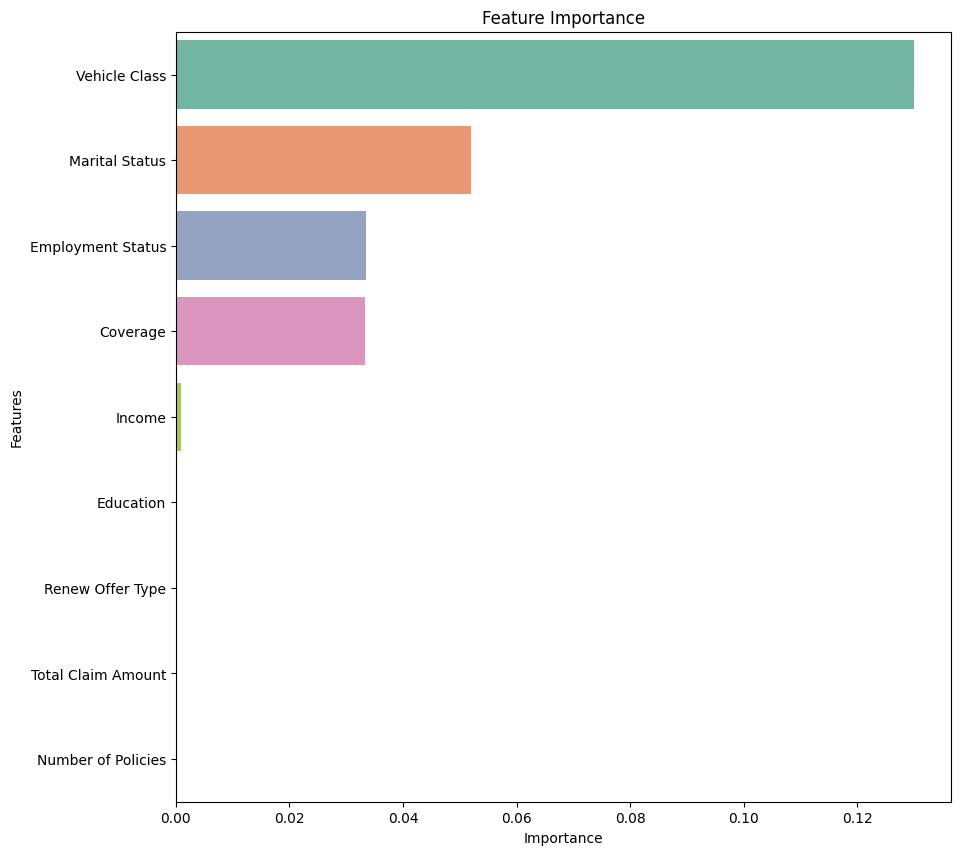

In [40]:
#Horizontal Bar Plot of Feature Importance with Seaborn
plt.figure(figsize=(10,10))
sns.barplot(x='Importance', y='Features', data=feature_importance, palette='Set2')
plt.title('Feature Importance')
plt.show()

In our Gradient Boosting Regressor model aimed at predicting Customer Lifetime Value (CLV), the feature importance analysis sheds light on the factors that most significantly influence CLV prediction.

* **Vehicle Class (0.13)**: The highest-ranking feature in our model is 'Vehicle Class', suggesting that the type or class of vehicle owned by customers holds considerable importance in predicting their lifetime value. This could imply that certain vehicle types correlate with higher CLV, reflecting different customer behaviors or purchasing patterns.

* **Marital Status (0.052)**: Following closely, 'Marital Status' emerges as a significant predictor of CLV. This indicates that marital status may play a substantial role in determining customer lifetime value, potentially reflecting differences in spending habits, financial stability, or household dynamics.

* **Employment Status (0.0335)**: The 'Employment Status' feature holds moderate importance, suggesting that the employment status of customers contributes meaningfully to CLV prediction. This may reflect variations in income levels, spending patterns, or long-term financial outlooks among employed and unemployed individuals.

* **Coverage (0.03345)**: 'Coverage' plays an importance role in CLV prediction, indicating that the type and extent of insurance coverage held by customers significantly impact their lifetime value. This suggests that customers with different coverage levels may exhibit distinct lifetime value trajectories.

* **Income (0.000941)**: While 'Income' contributes to the model, its importance is relatively lower compared to other features. This suggests that income level alone may not be the most influential factor in predicting CLV, although it still provides some predictive value in conjunction with other variables.

* **Education (0.000208)**: Similarly, 'Education' demonstrates limited importance in CLV prediction, indicating that the level of education attained by customers may have minimal direct impact on their lifetime value.

* **Renew Offer Type (0.00013)**: The 'Renew Offer Type' feature shows minimal importance, suggesting that the type of renewal offer extended to customers may have limited predictive power regarding their lifetime value.

* **Total Claim Amount (0.000047)**: 'Total Claim Amount' holds relatively low importance in predicting CLV, indicating that past insurance claims may not be strong indicators of future customer lifetime value.

* **Number of Policies (0)**: The 'Number of Policies' feature, with a feature importance value of 0, suggests that this particular feature may not significantly contribute to predicting customer lifetime value in our model.

Understanding the relative importance of each feature enables us to refine our CLV prediction model, prioritize key variables, and ultimately optimize its predictive performance in forecasting customer lifetime value accurately.

### Residual Analysis

In [21]:
#Residual
residual = Y_test - Y_pred

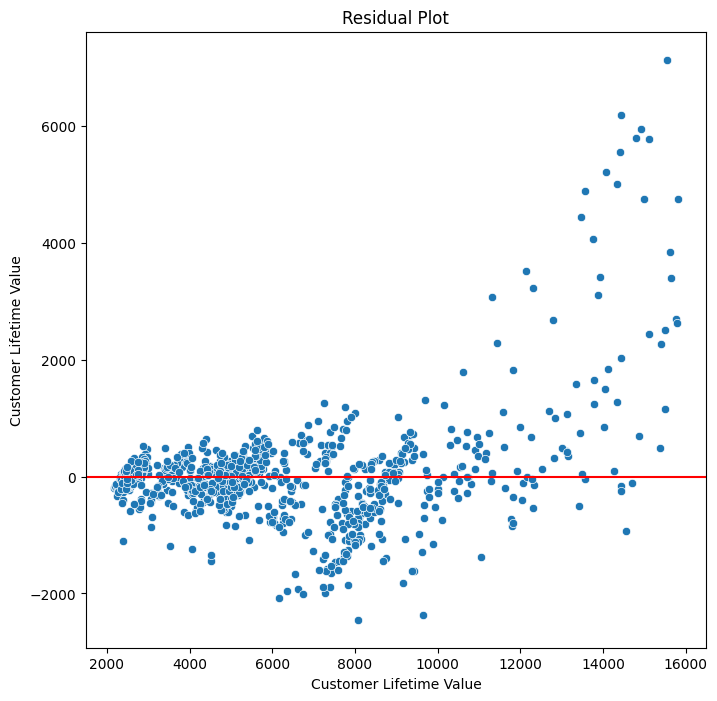

In [22]:
#See residual plot with SeaBorn
plt.figure(figsize=(8,8))
sns.scatterplot(x=Y_test, y=residual, palette='Set2')
plt.axhline(0, color='red')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.show()

In [31]:
# #Plot Residual Plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=Y_test, y=residual, mode='markers', marker_color='red'))
# #Add a horizontal line at 0
# fig.add_shape(
#     type="line",
#     x0=0,
#     x1=max(Y_test),
#     y0=0,
#     y1=0,
#     line=dict(
#         color="blue",
#         width=2,
#     )
# )
# fig.update_layout(title='Residual Plot', xaxis_title='Prediction', yaxis_title='Residual')
# fig.update_layout(width=800, height=800)
# fig.show()

In [28]:
#Dataframe of Prediction and Actual Value
result = pd.DataFrame(X_test)
result=result.merge(source[['Customer Lifetime Value']], left_index=True, right_index=True)
result.rename(columns={'Customer Lifetime Value':'Actual'}, inplace=True)
result['Prediction'] = Y_pred
result['Residual'] = residual
result['Percentage Error'] = round(np.abs(residual/Y_test)*100, 2)
result.reset_index(drop=True, inplace=True)

In [29]:
#Show Outside Residual
outside1 = result[result['Residual'] < -2100]
outside2 = result[(result['Residual'] > 2700)]
residual_outside = result[result['Prediction'] > 6000]
sample_outside = source[source['Customer Lifetime Value'] > 5445]
display(residual_outside.describe(), residual_outside.describe(include='object'))
print(f'Total data from Residual Outside is {round(((len(sample_outside)/len(source))*100), 2)}% data.')

,Number of Policies,Total Claim Amount,Income,Actual Value,Prediction,Residual,Percentage Error
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,3.721180,453.853582,37585.109920,9208.818702,9113.665185,95.153517,9.179276
std,2.297148,266.214073,29232.090887,2518.211147,1944.049446,1396.840211,8.574332
min,1.000000,0.517753,0.000000,5445.373289,6005.604667,-2449.121462,0.010000
25%,2.000000,279.706613,16794.000000,7446.812516,7978.964559,-703.494310,2.950000
50%,3.000000,435.527845,34133.000000,8404.395122,8844.257539,-104.062786,6.760000
75%,5.000000,587.409205,60433.000000,10506.937060,10152.215283,432.689777,12.910000
max,9.000000,1448.994134,99759.000000,15806.533970,15503.424282,7131.473818,45.860000


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education
count,373,373,373,373,373,373
unique,4,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,174,170,174,243,215,118


Total data from Residual Outside is 48.98% data.


Upon examining the residual plot generated from our Gradient Boosting Regressor model for Customer Lifetime Value (CLV) prediction, we observe that the spread of residual values becomes widely dispersed for predicted values equal to or greater than $6,000.

This phenomenon indicates that our model tends to exhibit larger prediction errors or discrepancies for CLV values beyond the $6,000 threshold. Several factors may contribute to this observation:

1. **Non-linearity or Complexity in the Data**

* The relationship between predictor variables and CLV may not follow a linear pattern beyond a certain threshold. As CLV values increase, the underlying relationships may become more complex or non-linear, challenging our model's ability to accurately predict these higher values.

2. **Model Limitations**

* Despite our best efforts in model selection and tuning, the Gradient Boosting Regressor may have inherent limitations in capturing the nuances of CLV prediction, especially for customers with higher lifetime values. The model may struggle to generalize well beyond the range of CLV values observed in the training data.

3. **Unaccounted Factors**

* There may be additional factors or variables not included in our model that influence CLV for high-value customers. These unaccounted variables could introduce unpredictability and contribute to the widening spread of residual values in the predicted CLV range.

Addressing the challenges posed by widely spread residual values in the higher CLV range requires careful consideration and potential adjustments to our modeling approach.

### Gauss-Markov Assumptions

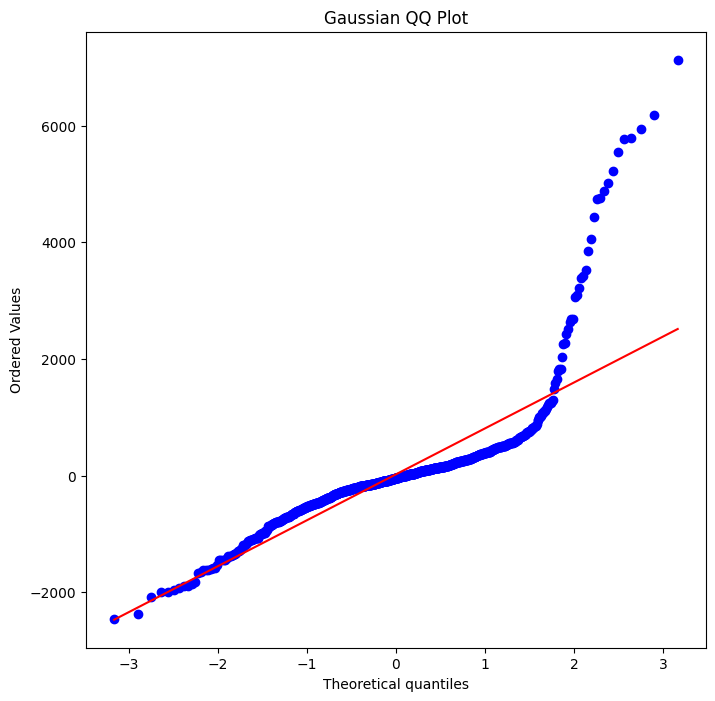

In [37]:
#Gaussian QQ Plot
plt.figure(figsize=(8,8))
stats.probplot(residual, plot=plt)
plt.title('Gaussian QQ Plot')
plt.show()

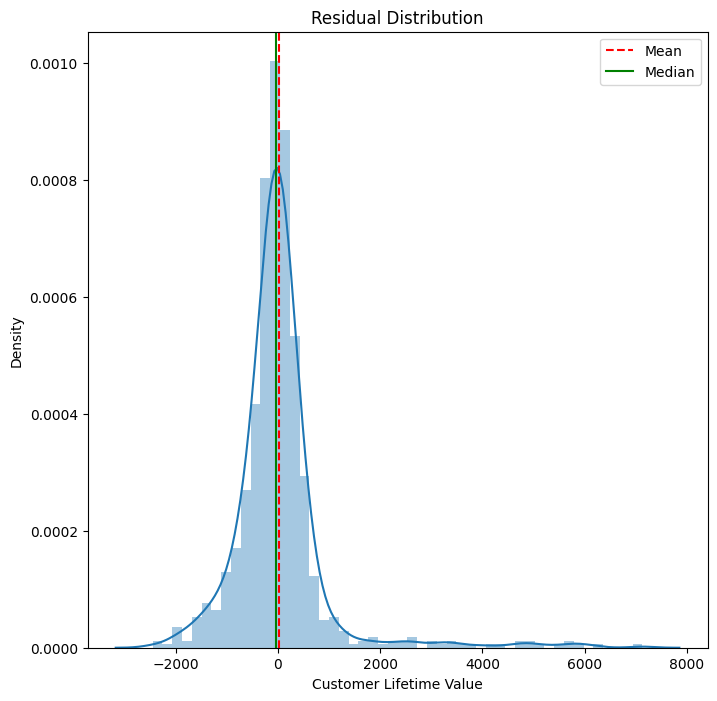

The mean of the residuals is 22.66
The median of the residuals is -42.34


In [35]:
#Gaussian Distribution
# Gaussian Distribution
plt.figure(figsize=(8,8))
sns.distplot(residual)

# Calculate the mean and median of the residuals
mean_res = np.mean(residual)
median_res = np.median(residual)

# Add vertical lines for the mean and median
plt.axvline(mean_res, color='r', linestyle='--', label='Mean')
plt.axvline(median_res, color='g', linestyle='-', label='Median')

plt.title('Residual Distribution')
plt.legend()  # Add a legend to show the labels for the mean and median
plt.show()
print(f'The mean of the residuals is {round(mean_res, 2)}')
print(f'The median of the residuals is {round(median_res, 2)}')

In [36]:
#Import Pearson Normal Test
from scipy.stats import normaltest

#Normality Test for Residual with Pearson Normal Test
stat, p_Value = normaltest(residual)
print(f'p-Value: {p_Value}')
if p_Value < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')

p-Value: 1.2660560933315112e-141
The data is not normally distributed


In [30]:
result.sort_values(by='Actual', inplace=True)
result.reset_index(drop=True, inplace=True)
result

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Total Claim Amount,Income,Actual,Prediction,Residual,Percentage Error
0,Four-Door Car,Basic,Offer2,Unemployed,Single,High School or Below,1.0,453.600000,0.0,2175.624856,2368.092140,-192.467284,8.85
1,Four-Door Car,Basic,Offer1,Unemployed,Single,College,1.0,439.200000,0.0,2191.133237,2352.882284,-161.749047,7.38
2,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,1.0,292.800000,0.0,2202.335200,2378.601187,-176.265987,8.00
3,Two-Door Car,Basic,Offer1,Unemployed,Single,College,1.0,446.400000,0.0,2222.865016,2352.882284,-130.017268,5.85
4,Four-Door Car,Basic,Offer3,Disabled,Single,High School or Below,1.0,251.449490,12131.0,2242.090803,2401.040239,-158.949436,7.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,Four-Door Car,Premium,Offer2,Unemployed,Married,Master,2.0,439.352186,0.0,15610.900650,11761.598062,3849.302588,24.66
885,Four-Door Car,Premium,Offer1,Employed,Married,College,2.0,371.322406,49214.0,15638.575990,12248.618397,3389.957593,21.68
886,SUV,Premium,Offer1,Employed,Married,High School or Below,7.0,950.400000,39032.0,15762.603490,13070.739156,2691.864334,17.08
887,SUV,Premium,Offer4,Employed,Married,College,3.0,940.800000,81119.0,15785.296920,13154.153398,2631.143522,16.67


Based on the conditions above, such as the difference between the median and mean residuals, the lack of normality in the residual distribution, and the presence of heteroscedasticity, all point to potential violations of key Gauss-Markov assumptions.

* The disparity between the median and mean residuals suggests a lack of symmetry around zero, contradicting the assumption of a zero conditional mean.

* Furthermore, the non-normal distribution of residuals, as indicated by QQ plots and normality tests, violates the Gauss-Markov assumption of normally distributed errors. While normality is not strictly required, it facilitates more efficient estimates and accurate inference.

* Additionally, the presence of heteroscedasticity, where the variance of residuals varies across predicted values, is a violation of the homoscedasticity assumption. Homoscedasticity ensures consistent variability of residuals across different levels of the independent variables.

So, I can say the result from the model violates key assumptions of the Gauss-Markov theorem, it can introduce bias into the estimates and predictions. Bias in this context refers to systematic errors or inaccuracies in the model's predictions that arise from violations of underlying assumptions or from the model's structure itself.

In this case, the model exhibits violations such as non-normality of residuals, heteroscedasticity, and a disparity between the median and mean residuals, it indicates potential sources of bias in the model. These issues can lead to inaccurate parameter estimates, unreliable confidence intervals, and skewed predictions.

## Conclusion and Recommendation

**Conclusion**

The analysis of Red Machine Learning project reveals several important insights and considerations:

1. **Model Performance**

* The evaluation of the Gradient Boosting Regressor model for predicting Customer Lifetime Value (CLV) highlighted significant challenges and violations of key Gauss-Markov assumptions. These include disparities between median and mean residuals, non-normality in residual distributions, and the presence of heteroscedasticity.

2. **Implications of Violations**

* These violations can lead to biased parameter estimates, inefficient standard errors, and inaccurate predictions. It's essential to address these issues to improve the reliability and validity of the CLV predictions.

**Recommendation**

1. **Diagnostic Analysis**

* Conduct a thorough diagnostic analysis to understand the root causes of violations observed in the model. Explore the data distribution, identify influential data points, and assess the relationships between variables to gain deeper insights.

2. **Model Refinement**

* Consider refining modeling approach by addressing the specific violations observed. This may involve employing alternative estimation techniques that are robust to violations of Gauss-Markov assumptions, such as generalized linear models or robust regression methods.

3. **Feature Engineering**

* Explore the possibility of feature engineering to create new variables or transform existing ones that better capture the underlying relationships in the data. This could help mitigate biases and improve the predictive performance of the model.

4. **Validation Strategies**

* Implement rigorous validation strategies, including cross-validation and out-of-sample testing, to assess the generalization performance of the refined model. This ensures that the model performs well on unseen data and provides reliable predictions in real-world scenarios.

5. **Continuous Improvement**

* Adopt a mindset of continuous improvement by iteratively refining the model based on feedback from validation results and diagnostic analyses. Regularly monitor the model's performance and update it as new data becomes available or as the business context evolves.

By implementing these recommendations and addressing the challenges identified in Red ML project, you can enhance the accuracy, reliability, and applicability of Red Customer Lifetime Value prediction model, ultimately driving more informed decision-making and maximizing business value.

# Thank You